In [4]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "C:\\Users\\kiran\\Downloads\\Breathonix All data2.csv"



data = pd.read_csv(file_path, skiprows=[1])


for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='ignore')


data.columns

cols_to_drop = [col for col in data.columns if col.startswith('r')]
data = data.drop(columns=cols_to_drop)
data


selected_columns = data.iloc[:, 2:]


cols_to_drop = []


for i in range(0, len(selected_columns.columns), 2):

    if i + 1 >= len(selected_columns.columns):
        break

    concentration_col = selected_columns.columns[i]
    background_col = selected_columns.columns[i + 1]

    avg_concentration = selected_columns[concentration_col].mean()
    avg_background = selected_columns[background_col].mean()

    if avg_concentration < 1.2 * avg_background:
        cols_to_drop.extend([concentration_col, background_col])


selected_columns_cleaned = selected_columns.drop(columns=cols_to_drop)


selected_columns_cleaned


final_columns = [
    col for col in selected_columns_cleaned.columns if "Unnamed" not in col]
selected_columns_final_cleaned = selected_columns_cleaned.drop(
    columns=[col for col in selected_columns_cleaned.columns if "Unnamed" in col])


selected_columns_final_cleaned


selected_columns_with_info = pd.concat(
    [data[['Samples', 'Pos_Neg']], selected_columns_final_cleaned], axis=1)


selected_columns_with_info

Samples  Pos_Neg      m023      m024  m033_Methanol  \
0      BB100  Healthy  1.590810  1.020350      352.49100   
1      BB104  Healthy  2.326547  1.487771      364.10710   
2      BB105  Healthy  2.347437  1.675582      164.50294   
3      BB106  Healthy  2.614369  1.716040      622.03540   
4      BB107  Healthy  2.446289  1.498591      292.41983   
..       ...      ...       ...       ...            ...   
213  Covid46    Covid  2.355917  1.263386      334.69348   
214  Covid47    Covid  1.975796  1.382842      206.61171   
215  Covid48    Covid  2.215475  1.532871      242.77010   
216  Covid49    Covid  2.668329  1.301251      148.19850   
217  Covid50    Covid  2.146431  1.246325      191.21077   

     m034.027_Methanol_Isot  m034.995_H2S      m035      m036  \
0                  4.682102      0.227659  0.894753  0.607673   
1                  4.804621      0.187809  0.946020  0.902298   
2                  2.716097      0.251564  0.487552  0.933328   
3                  7.697475      0.222011  1.467371  1.093977   
4                  4.193548      0.336132  0.846603  0.905637   
..                      ...           ...       ...       ...   
213                4.018489      0.197514  1.038258  0.910793   
214                3.043121      0.142561  0.620594  1.045869   
215                3.289665      0.211579  0.704287  1.356484   
216                2.151292      0.522836  0.564371  1.042602   
217                2.507961      0.218205  0.637953  1.046702   

     m049_Methanethiol  ...  m332.850  m332.900      m335      m371      m372  \
0             0.563695  ...  0.019350  0.021495  0.032276  0.120754  0.058110   
1             0.348686  ...  0.032206  0.018367  0.039121  0.331205  0.117434   
2             0.840101  ...  0.036017  0.016639  0.052599  0.563775  0.202713   
3             1.096143  ...  0.018766  0.023178  0.069709  0.291503  0.144669   
4             0.755844  ...  0.030411  0.037488  0.056241  0.357743  0.183416   
..                 ...  ...       ...       ...       ...       ...       ...   
213           1.586811  ...  0.038811  0.046107  0.029122  0.891055  0.279098   
214           2.420317  ...  0.021347  0.016583  0.026156  0.873213  0.298775   
215           1.774648  ...  0.029846  0.027470  0.032430  2.531869  0.926146   
216           3.280635  ...  0.035730  0.023911  0.026273  1.142284  0.421544   
217           1.190429  ...  0.030855  0.016662  0.028414  0.993783  0.341681   

         m373      m374      m375      m376      m385  
0    0.073083  0.028000  0.032295  0.025864  0.034377  
1    0.190904  0.075945  0.055244  0.041459  0.032208  
2    0.334627  0.126616  0.107149  0.055190  0.047870  
3    0.144810  0.072249  0.063097  0.035006  0.060450  
4    0.227572  0.087258  0.096746  0.063641  0.044835  
..        ...       ...       ...       ...       ...  
213  0.431994  0.162646  0.077648  0.043711  0.145574  
214  0.439112  0.170736  0.068834  0.016608  0.052129  
215  1.320926  0.401201  0.196823  0.089775  0.089966  
216  0.562224  0.157303  0.106977  0.057201  0.059389  
217  0.515008  0.166280  0.121270  0.026101  0.066451  

[218 rows x 151 columns]

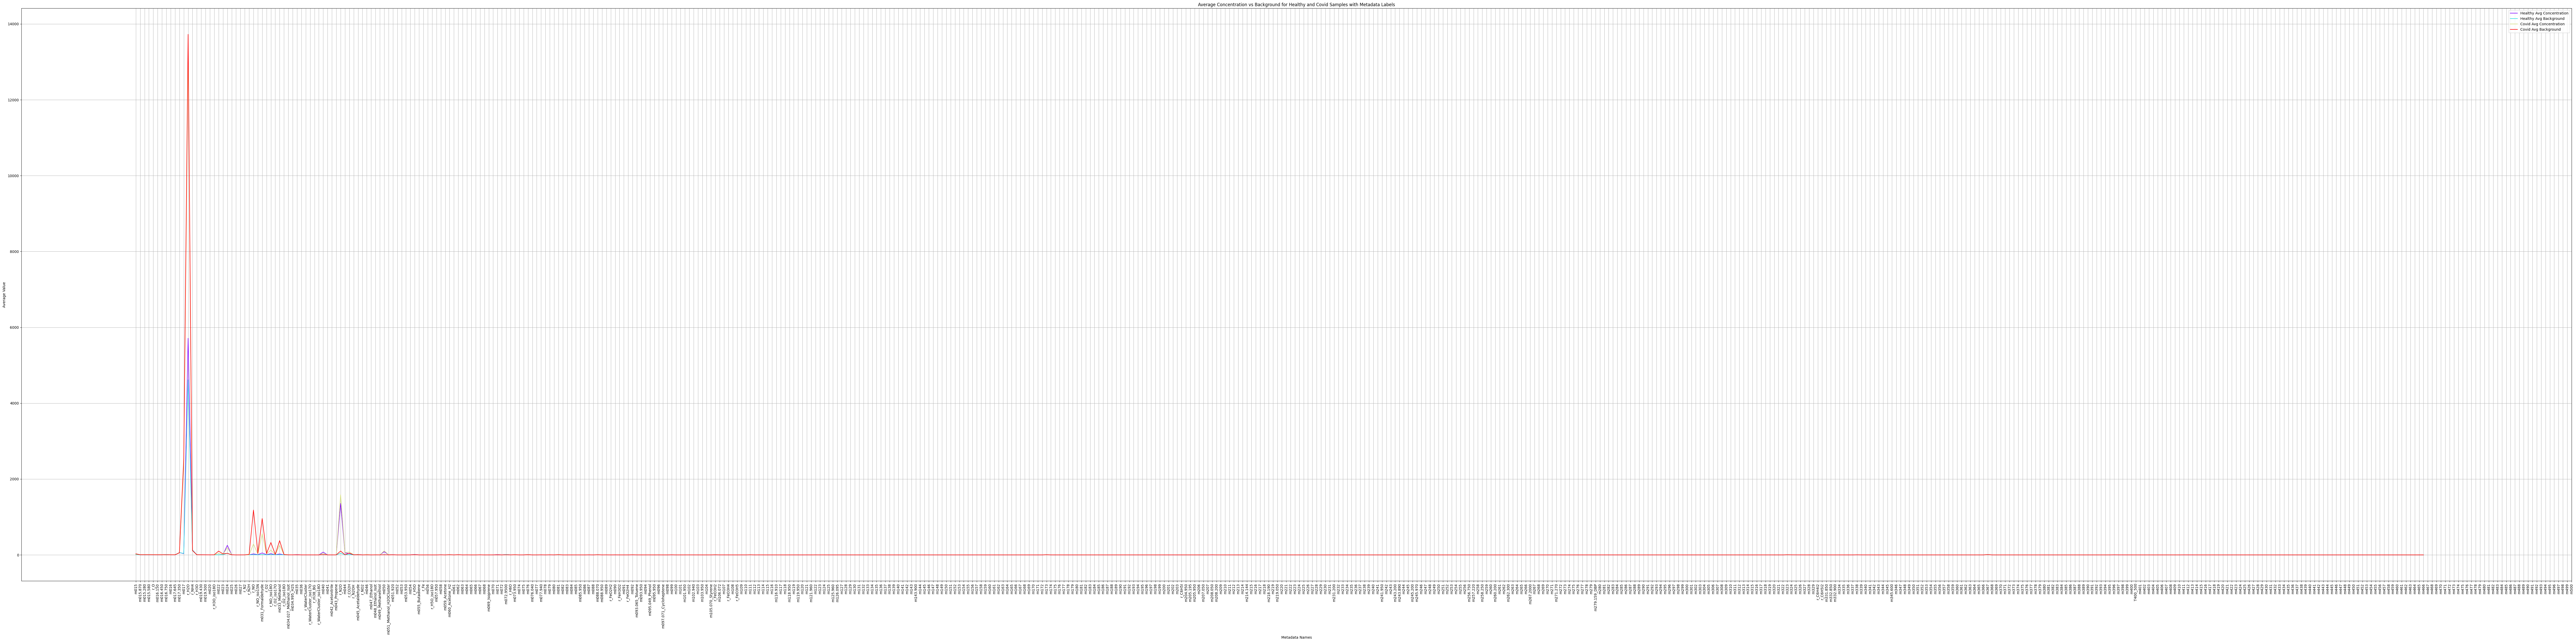

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File path - replace with the actual path on your system if different
file_path = "C:\\Users\\kiran\\Downloads\\Breathonix All data2.csv"

# Read the CSV file, skipping the second row
data = pd.read_csv(file_path, skiprows=[1])

# Convert columns to numeric where possible
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='ignore')

# Drop columns starting with 'r'
cols_to_drop = [col for col in data.columns if col.startswith('r')]
data = data.drop(columns=cols_to_drop)

# Select columns starting from the third
selected_columns = data.iloc[:, 2:]

# Filter for 'Healthy' samples
healthy_data = selected_columns[data['Pos_Neg'] == 'Healthy']

# Filter for 'Covid' samples
covid_data = selected_columns[data['Pos_Neg'] == 'Covid']

# Calculate average for each column in the 'Healthy' and 'Covid' datasets
avg_healthy = healthy_data.mean()
avg_covid = covid_data.mean()

# Initialize lists to store average concentration and background values
avg_concentration_healthy = []
avg_background_healthy = []
avg_concentration_covid = []
avg_background_covid = []

# Extracting average concentration and background values
for i in range(0, len(avg_healthy), 2):
    if i + 1 < len(avg_healthy):  # Ensure not to go out of index range
        avg_concentration_healthy.append(avg_healthy[i])
        avg_background_healthy.append(avg_healthy[i + 1])
        avg_concentration_covid.append(avg_covid[i])
        avg_background_covid.append(avg_covid[i + 1])

# Read the first row of the CSV file to get the metadata names
metadata_row = pd.read_csv(file_path, nrows=1)

# Extract column names for concentration and background, skipping the first two metadata columns
metadata_names = metadata_row.columns[2:]

# Set up the plot
plt.figure(figsize=(100, 25))

# Generate rainbow colors for the lines
colors = plt.cm.rainbow(np.linspace(0, 1, 4))

# Plot Healthy and Covid averages
plt.plot(avg_concentration_healthy, color=colors[0], label='Healthy Avg Concentration')
plt.plot(avg_background_healthy, color=colors[1], label='Healthy Avg Background')
plt.plot(avg_concentration_covid, color=colors[2], label='Covid Avg Concentration')
plt.plot(avg_background_covid, color=colors[3], label='Covid Avg Background')

# Set metadata names as x-axis labels, rotating them for better readability
plt.xticks(ticks=np.arange(len(metadata_names) // 2), labels=metadata_names[::2], rotation=90)

# Add plot title, labels, legend, and grid
plt.title('Average Concentration vs Background for Healthy and Covid Samples with Metadata Labels')
plt.xlabel('Metadata Names')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()


C:\Users\kiran\AppData\Local\Temp\ipykernel_12488\3434427154.py:24: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_healthy = healthy_data.mean()
C:\Users\kiran\AppData\Local\Temp\ipykernel_12488\3434427154.py:25: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_covid = covid_data.mean()


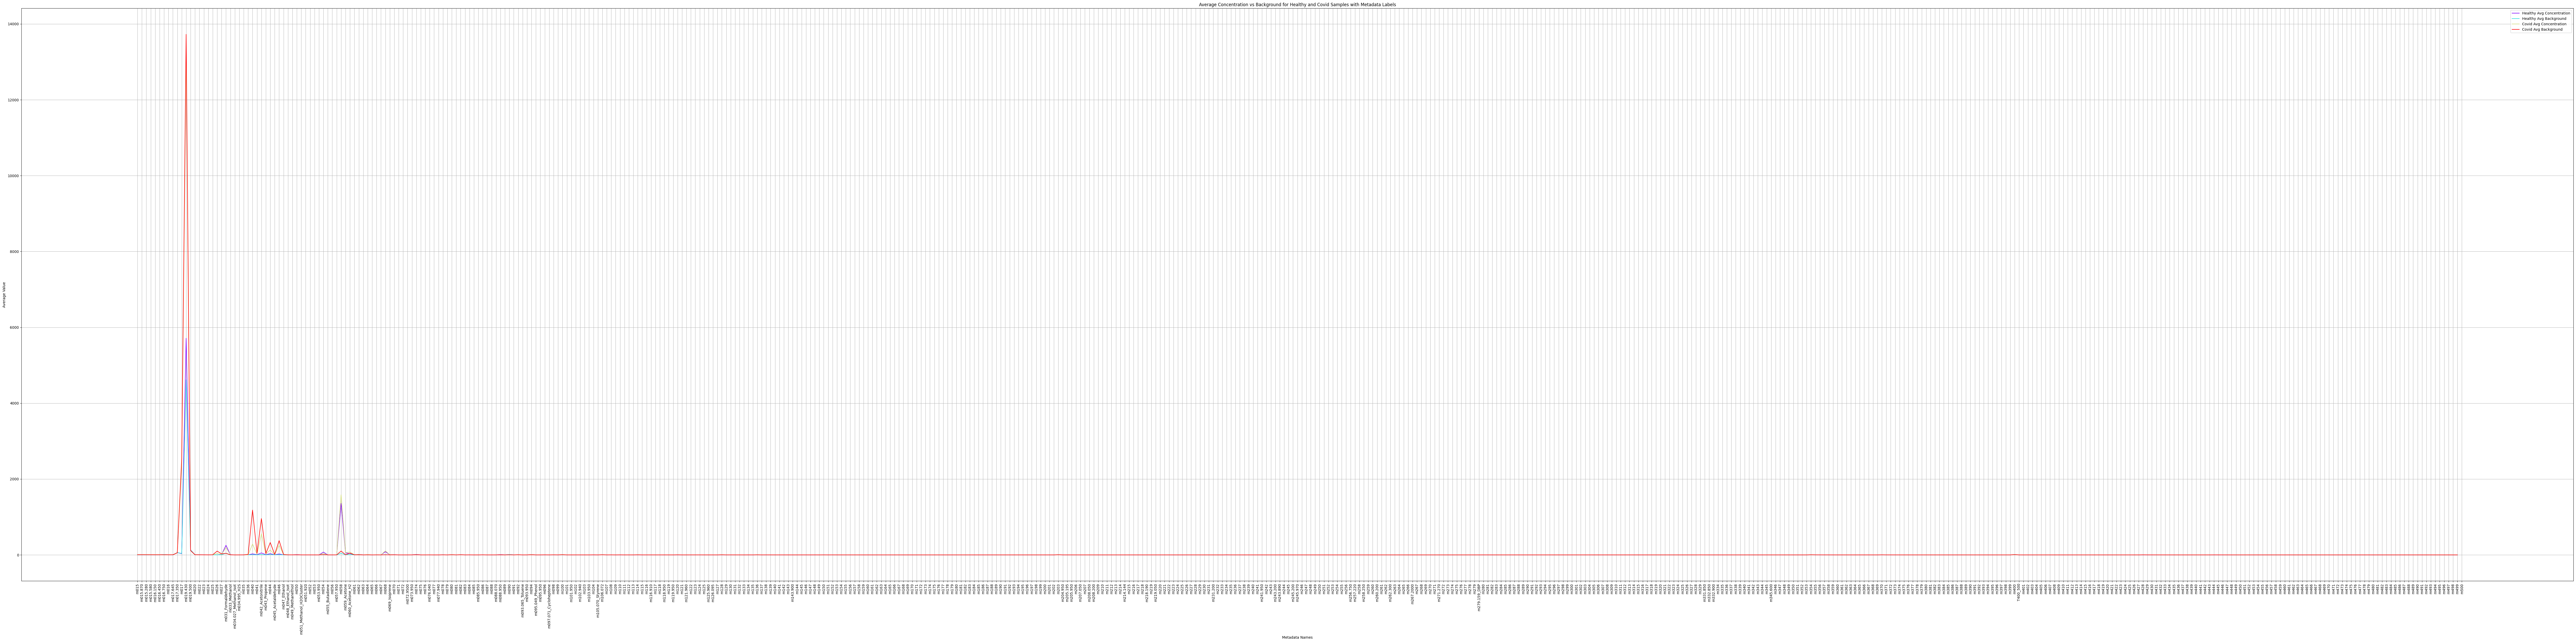

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File path - replace with the actual path on your system if different
file_path = "C:\\Users\\kiran\\Downloads\\Breathonix All data2.csv"

# Read the CSV file, skipping the second row
data = pd.read_csv(file_path, skiprows=[1])

# Convert columns to numeric where possible, errors='ignore' will keep non-numeric columns unchanged
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='ignore')

# Drop columns starting with 'r'
cols_to_drop = [col for col in data.columns if col.startswith('r')]
data = data.drop(columns=cols_to_drop)

# Filter for 'Healthy' and 'Covid' samples
healthy_data = data[data['Pos_Neg'] == 'Healthy']
covid_data = data[data['Pos_Neg'] == 'Covid']

# Calculate average for each column in the 'Healthy' and 'Covid' datasets
avg_healthy = healthy_data.mean()
avg_covid = covid_data.mean()

# Initialize lists to store average concentration and background values
avg_concentration_healthy = []
avg_background_healthy = []
avg_concentration_covid = []
avg_background_covid = []

# Assuming every alternate column starting from the third is a concentration and the next is its corresponding background
for i in range(2, len(avg_healthy), 2):  # Start from 3rd column (index 2)
    if i + 1 < len(avg_healthy):  # Ensure not going out of index range
        avg_concentration_healthy.append(avg_healthy[i])
        avg_background_healthy.append(avg_healthy[i + 1])
        avg_concentration_covid.append(avg_covid[i])
        avg_background_covid.append(avg_covid[i + 1])

# Read the first row of the CSV file to get the metadata names
metadata_row = pd.read_csv(file_path, nrows=1)

# Drop 'r' columns from metadata names as well
metadata_names = metadata_row.columns[~metadata_row.columns.str.startswith('r')]

# Set up the plot
plt.figure(figsize=(100, 25))

# Generate rainbow colors for the lines
colors = plt.cm.rainbow(np.linspace(0, 1, 4))

# Plot Healthy and Covid averages
plt.plot(avg_concentration_healthy, color=colors[0], label='Healthy Avg Concentration')
plt.plot(avg_background_healthy, color=colors[1], label='Healthy Avg Background')
plt.plot(avg_concentration_covid, color=colors[2], label='Covid Avg Concentration')
plt.plot(avg_background_covid, color=colors[3], label='Covid Avg Background')

# Set metadata names as x-axis labels, rotating them for better readability
plt.xticks(ticks=np.arange(len(metadata_names[2:]) // 2), labels=metadata_names[2:][::2], rotation=90)

# Add plot title, labels, legend, and grid
plt.title('Average Concentration vs Background for Healthy and Covid Samples with Metadata Labels')
plt.xlabel('Metadata Names')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()


Norman Healthy Vs Singapore Covid


C:\Users\kiran\AppData\Local\Temp\ipykernel_12488\2649840815.py:24: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_healthy = healthy_data.mean()
C:\Users\kiran\AppData\Local\Temp\ipykernel_12488\2649840815.py:25: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_covid = covid_data.mean()


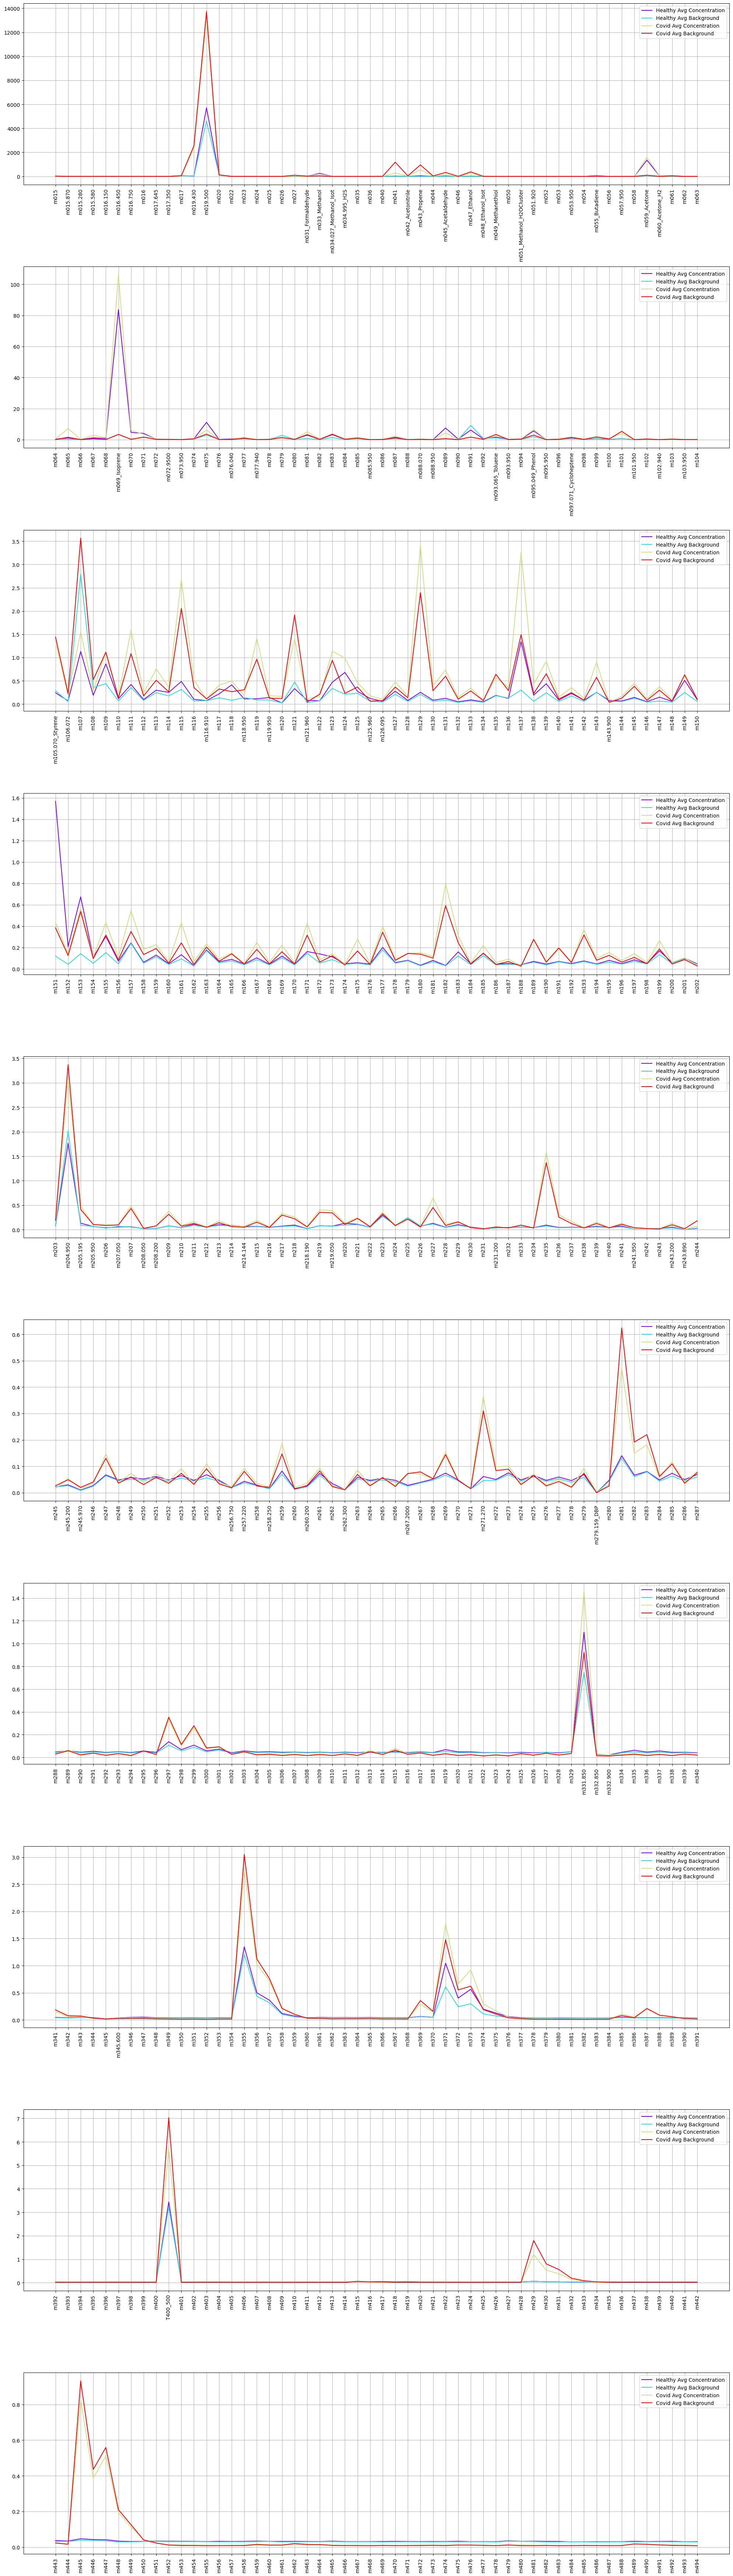

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File path - replace with the actual path on your system if different
file_path = "C:\\Users\\kiran\\Downloads\\Breathonix All data2.csv"

# Read the CSV file, skipping the second row
data = pd.read_csv(file_path, skiprows=[1])

# Convert columns to numeric where possible, errors='ignore' will keep non-numeric columns unchanged
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='ignore')

# Drop columns starting with 'r'
cols_to_drop = [col for col in data.columns if col.startswith('r')]
data = data.drop(columns=cols_to_drop)

# Filter for 'Healthy' and 'Covid' samples
healthy_data = data[data['Pos_Neg'] == 'Healthy']
covid_data = data[data['Pos_Neg'] == 'Covid']

# Calculate average for each column in the 'Healthy' and 'Covid' datasets
avg_healthy = healthy_data.mean()
avg_covid = covid_data.mean()

# Read the first row of the CSV file to get the metadata names, excluding those starting with 'r'
metadata_row = pd.read_csv(file_path, nrows=1)
metadata_names = metadata_row.columns[~metadata_row.columns.str.startswith('r')][2:]  # Skipping 'Samples' and 'Pos_Neg'

# Number of plots
num_plots = 10
pairs_per_plot = len(metadata_names) // (2 * num_plots)  # Divide by 2 for pairs of concentration and background

# Generate subplots
fig, axes = plt.subplots(num_plots, 1, figsize=(20, 70))

# Loop through the number of plots
for i in range(num_plots):
    start_idx = i * pairs_per_plot * 2
    end_idx = start_idx + pairs_per_plot * 2

    # Generate rainbow colors for the lines
    colors = plt.cm.rainbow(np.linspace(0, 1, 4))

    # Plot for each subplot
    axes[i].plot(avg_healthy[start_idx:end_idx:2].values, color=colors[0], label='Healthy Avg Concentration')
    axes[i].plot(avg_healthy[start_idx + 1:end_idx:2].values, color=colors[1], label='Healthy Avg Background')
    axes[i].plot(avg_covid[start_idx:end_idx:2].values, color=colors[2], label='Covid Avg Concentration')
    axes[i].plot(avg_covid[start_idx + 1:end_idx:2].values, color=colors[3], label='Covid Avg Background')

    # Set metadata names as x-axis labels, rotating them for better readability
    axes[i].set_xticks(np.arange(pairs_per_plot))
    axes[i].set_xticklabels(metadata_names[start_idx:end_idx:2], rotation=90)
    
    # Add legend and grid
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


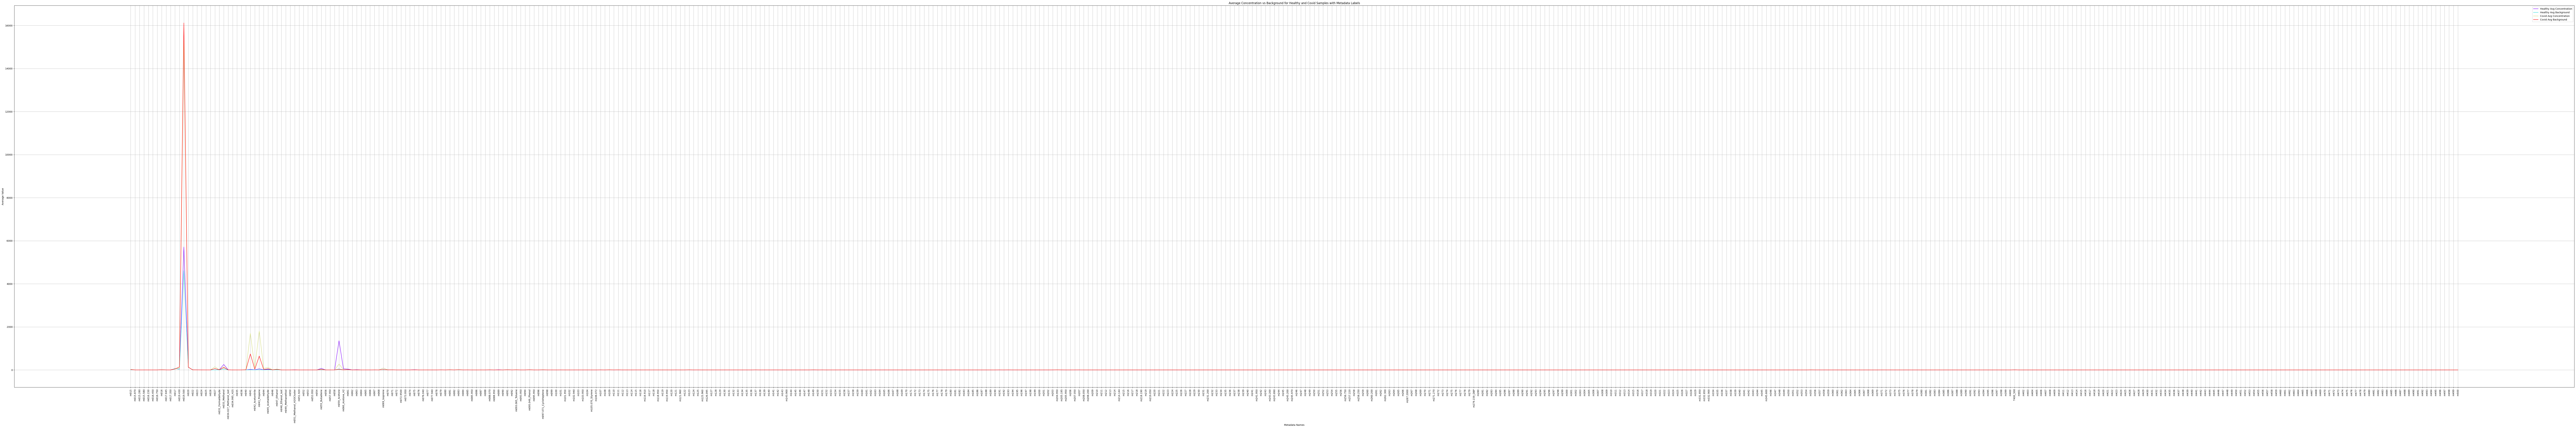

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the file path
file_path = "C:\\Users\\kiran\\Downloads\\Breathonix All dataR_OUHSC1.csv"

# Load the dataset and skip the first row which is a sub-header
data = pd.read_csv(file_path, skiprows=[1])

# Filter for 'Healthy' and 'Covid' samples
healthy_data = data[data['Pos_Neg'] == 'Healthy']
covid_data = data[data['Pos_Neg'] == 'Covid']

# Calculate the average for each column in the 'Healthy' and 'Covid' datasets
avg_healthy = healthy_data.iloc[:, 2:].astype(float).mean()
avg_covid = covid_data.iloc[:, 2:].astype(float).mean()

# Initialize lists to store average concentration and background values
avg_concentration = []
avg_background = []
avg_concentration_covid = []
avg_background_covid = []

# Extracting average concentration and background values
for i in range(0, len(avg_healthy), 2):
    avg_concentration.append(avg_healthy[i])
    avg_background.append(avg_healthy[i + 1])
    avg_concentration_covid.append(avg_covid[i])
    avg_background_covid.append(avg_covid[i + 1])

# Read the first row of the CSV file to get the metadata names
metadata_row = pd.read_csv(file_path, nrows=1)

# Extract column names for concentration and background
metadata_names = metadata_row.columns[2:]

# Set up the plot
plt.figure(figsize=(150, 25))

# Generate rainbow colors for the lines
num_lines = 4  # Two pairs (concentration and background) for each condition (Healthy and Covid)
colors = plt.cm.rainbow(np.linspace(0, 1, num_lines))

# Plot Healthy and Covid averages
plt.plot(avg_concentration, color=colors[0], label='Healthy Avg Concentration')
plt.plot(avg_background, color=colors[1], label='Healthy Avg Background')
plt.plot(avg_concentration_covid, color=colors[2], label='Covid Avg Concentration')
plt.plot(avg_background_covid, color=colors[3], label='Covid Avg Background')

# Set metadata names as x-axis labels, using every other label to match concentration columns
plt.xticks(ticks=np.arange(len(metadata_names) // 2), labels=metadata_names[::2], rotation=90)

# Add plot title, labels, legend, and grid
plt.title('Average Concentration vs Background for Healthy and Covid Samples with Metadata Labels')
plt.xlabel('Metadata Names')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()


Norman Healthy vs OUHSC covid

C:\Users\kiran\AppData\Local\Temp\ipykernel_12488\3273683189.py:24: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_healthy = healthy_data.mean()
C:\Users\kiran\AppData\Local\Temp\ipykernel_12488\3273683189.py:25: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_covid = covid_data.mean()


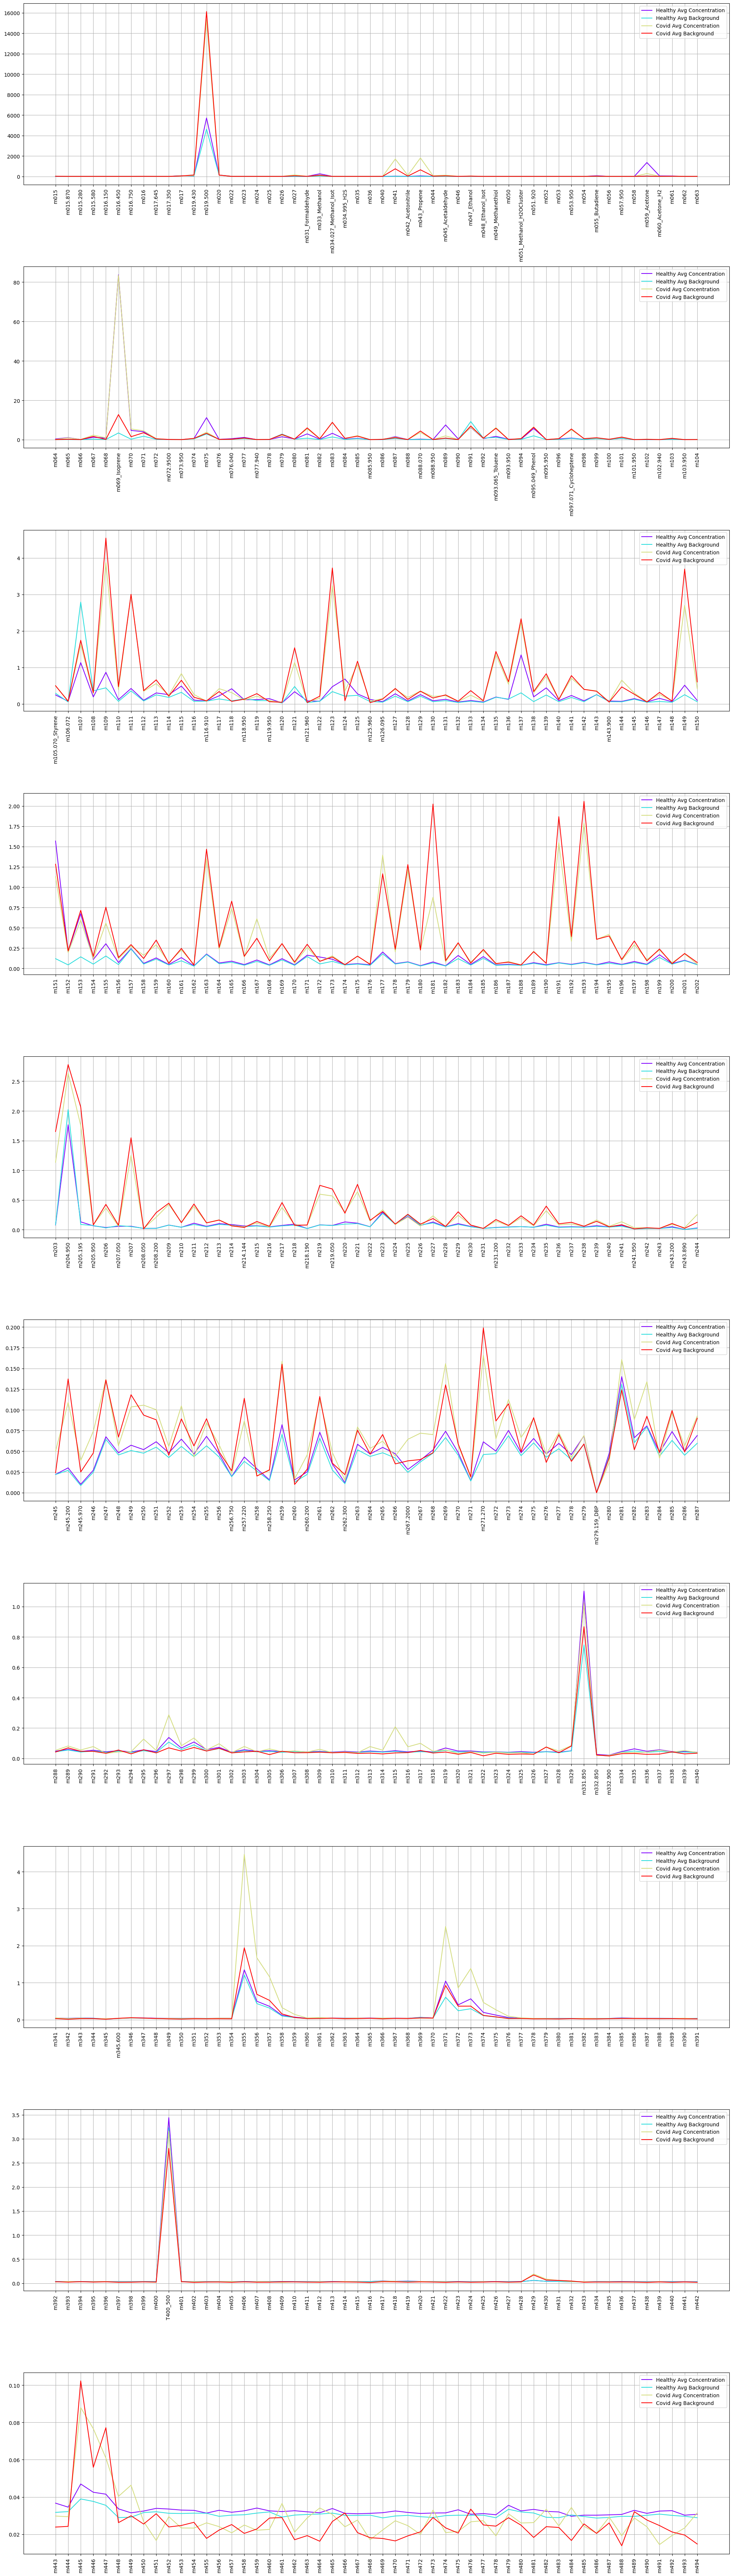

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File path - replace with the actual path on your system if different
file_path = "C:\\Users\\kiran\\Downloads\\Breathonix All dataR_OUHSC1.csv"

# Read the CSV file, skipping the second row
data = pd.read_csv(file_path, skiprows=[1])

# Convert columns to numeric where possible, errors='ignore' will keep non-numeric columns unchanged
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='ignore')

# Drop columns starting with 'r'
cols_to_drop = [col for col in data.columns if col.startswith('r')]
data = data.drop(columns=cols_to_drop)

# Filter for 'Healthy' and 'Covid' samples
healthy_data = data[data['Pos_Neg'] == 'Healthy']
covid_data = data[data['Pos_Neg'] == 'Covid']

# Calculate average for each column in the 'Healthy' and 'Covid' datasets
avg_healthy = healthy_data.mean()
avg_covid = covid_data.mean()

# Read the first row of the CSV file to get the metadata names, excluding those starting with 'r'
metadata_row = pd.read_csv(file_path, nrows=1)
metadata_names = metadata_row.columns[~metadata_row.columns.str.startswith('r')][2:]  # Skipping 'Samples' and 'Pos_Neg'

# Number of plots
num_plots = 10
pairs_per_plot = len(metadata_names) // (2 * num_plots)  # Divide by 2 for pairs of concentration and background

# Generate subplots
fig, axes = plt.subplots(num_plots, 1, figsize=(20, 70))

# Loop through the number of plots
for i in range(num_plots):
    start_idx = i * pairs_per_plot * 2
    end_idx = start_idx + pairs_per_plot * 2

    # Generate rainbow colors for the lines
    colors = plt.cm.rainbow(np.linspace(0, 1, 4))

    # Plot for each subplot
    axes[i].plot(avg_healthy[start_idx:end_idx:2].values, color=colors[0], label='Healthy Avg Concentration')
    axes[i].plot(avg_healthy[start_idx + 1:end_idx:2].values, color=colors[1], label='Healthy Avg Background')
    axes[i].plot(avg_covid[start_idx:end_idx:2].values, color=colors[2], label='Covid Avg Concentration')
    axes[i].plot(avg_covid[start_idx + 1:end_idx:2].values, color=colors[3], label='Covid Avg Background')

    # Set metadata names as x-axis labels, rotating them for better readability
    axes[i].set_xticks(np.arange(pairs_per_plot))
    axes[i].set_xticklabels(metadata_names[start_idx:end_idx:2], rotation=90)
    
    # Add legend and grid
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\kiran\AppData\Local\Temp\ipykernel_12488\872292329.py:24: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_healthy = healthy_data.mean()
C:\Users\kiran\AppData\Local\Temp\ipykernel_12488\872292329.py:25: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_cancer = cancer_data.mean()  # Updated from avg_covid to avg_cancer


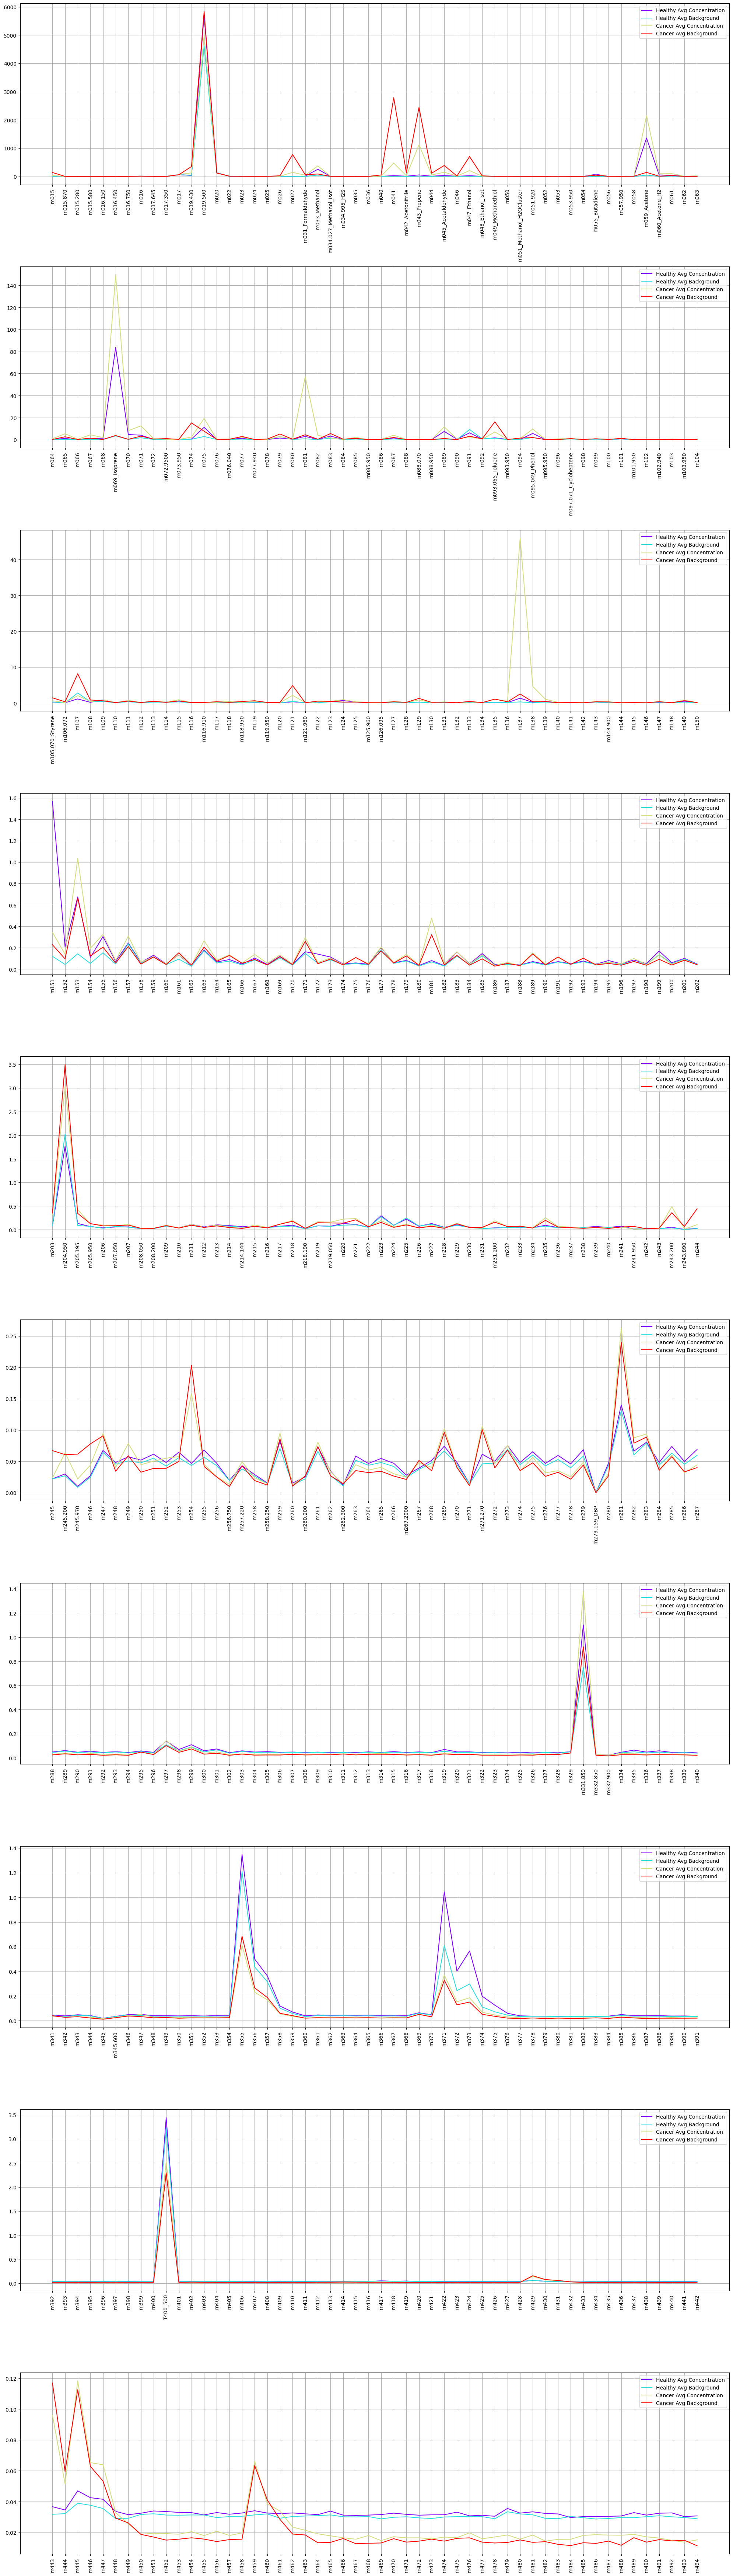

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Updated file path to the uploaded file
file_path = "C:\\Users\\kiran\\Downloads\\Breathonix AllHealthyVsCancer.csv"

# Read the CSV file, skipping the second row
data = pd.read_csv(file_path, skiprows=[1])

# Convert columns to numeric where possible, errors='ignore' will keep non-numeric columns unchanged
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='ignore')

# Drop columns starting with 'r'
cols_to_drop = [col for col in data.columns if col.startswith('r')]
data = data.drop(columns=cols_to_drop)

# Filter for 'Healthy' and 'Cancer' samples
healthy_data = data[data['Pos_Neg'] == 'Healthy']
cancer_data = data[data['Pos_Neg'] == 'Cancer']  # Updated from 'Covid' to 'Cancer'

# Calculate average for each column in the 'Healthy' and 'Cancer' datasets
avg_healthy = healthy_data.mean()
avg_cancer = cancer_data.mean()  # Updated from avg_covid to avg_cancer

# Read the first row of the CSV file to get the metadata names, excluding those starting with 'r'
metadata_row = pd.read_csv(file_path, nrows=1)
metadata_names = metadata_row.columns[~metadata_row.columns.str.startswith('r')][2:]  # Skipping 'Samples' and 'Pos_Neg'

# Number of plots
num_plots = 10
pairs_per_plot = len(metadata_names) // (2 * num_plots)  # Divide by 2 for pairs of concentration and background

# Generate subplots
fig, axes = plt.subplots(num_plots, 1, figsize=(20, 70))

# Loop through the number of plots
for i in range(num_plots):
    start_idx = i * pairs_per_plot * 2
    end_idx = start_idx + pairs_per_plot * 2

    # Generate rainbow colors for the lines
    colors = plt.cm.rainbow(np.linspace(0, 1, 4))

    # Plot for each subplot, updated labels from 'Covid' to 'Cancer'
    axes[i].plot(avg_healthy[start_idx:end_idx:2].values, color=colors[0], label='Healthy Avg Concentration')
    axes[i].plot(avg_healthy[start_idx + 1:end_idx:2].values, color=colors[1], label='Healthy Avg Background')
    axes[i].plot(avg_cancer[start_idx:end_idx:2].values, color=colors[2], label='Cancer Avg Concentration')  # Updated label
    axes[i].plot(avg_cancer[start_idx + 1:end_idx:2].values, color=colors[3], label='Cancer Avg Background')  # Updated label

    # Set metadata names as x-axis labels, rotating them for better readability
    axes[i].set_xticks(np.arange(pairs_per_plot))
    axes[i].set_xticklabels(metadata_names[start_idx:end_idx:2], rotation=90)
    
    # Add legend and grid
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Column names in the dataset: ['Samples', 'Nationality', 'Age', 'Gender', 'Zipcode ', 'Date ', 'Pos_Neg', 'm015', 'm015.870', 'm015.280', 'm015.580', 'm016.150', 'm016.450', 'm016.750', 'm016', 'm017.645', 'm017.350', 'm017', 'm019.430', 'm019.500', 'm020', 'm022', 'm023', 'm024', 'm025', 'm026', 'm027', 'm031_Formaldehyde', 'm033_Methanol', 'm034.027_Methanol_Isot', 'm034.995_H2S', 'm035', 'm036', 'm040', 'm041', 'm042_Acetonitrile', 'm043_Propene', 'm044', 'm045_Acetaldehyde', 'm046', 'm047_Ethanol', 'm048_Ethanol_Isot', 'm049_Methanethiol', 'm050', 'm051_Methanol_H2OCluster', 'm051.920', 'm052', 'm053', 'm053.950', 'm054', 'm055_Butadiene', 'm056', 'm057.950', 'm058', 'm059_Acetone', 'm060_Acetone_H2', 'm061', 'm062', 'm063', 'm064', 'm065', 'm066', 'm067', 'm068', 'm069_Isoprene', 'm070', 'm071', 'm072', 'm072.9500', 'm073.950', 'm074', 'm075', 'm076', 'm076.040', 'm077', 'm077.940', 'm078', 'm079', 'm080', 'm081', 'm082', 'm083', 'm084', 'm085', 'm085.950', 'm086', 'm087', 'm088', 

C:\Users\kiran\AppData\Local\Temp\ipykernel_12488\3275417656.py:27: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_healthy = healthy_data.mean()


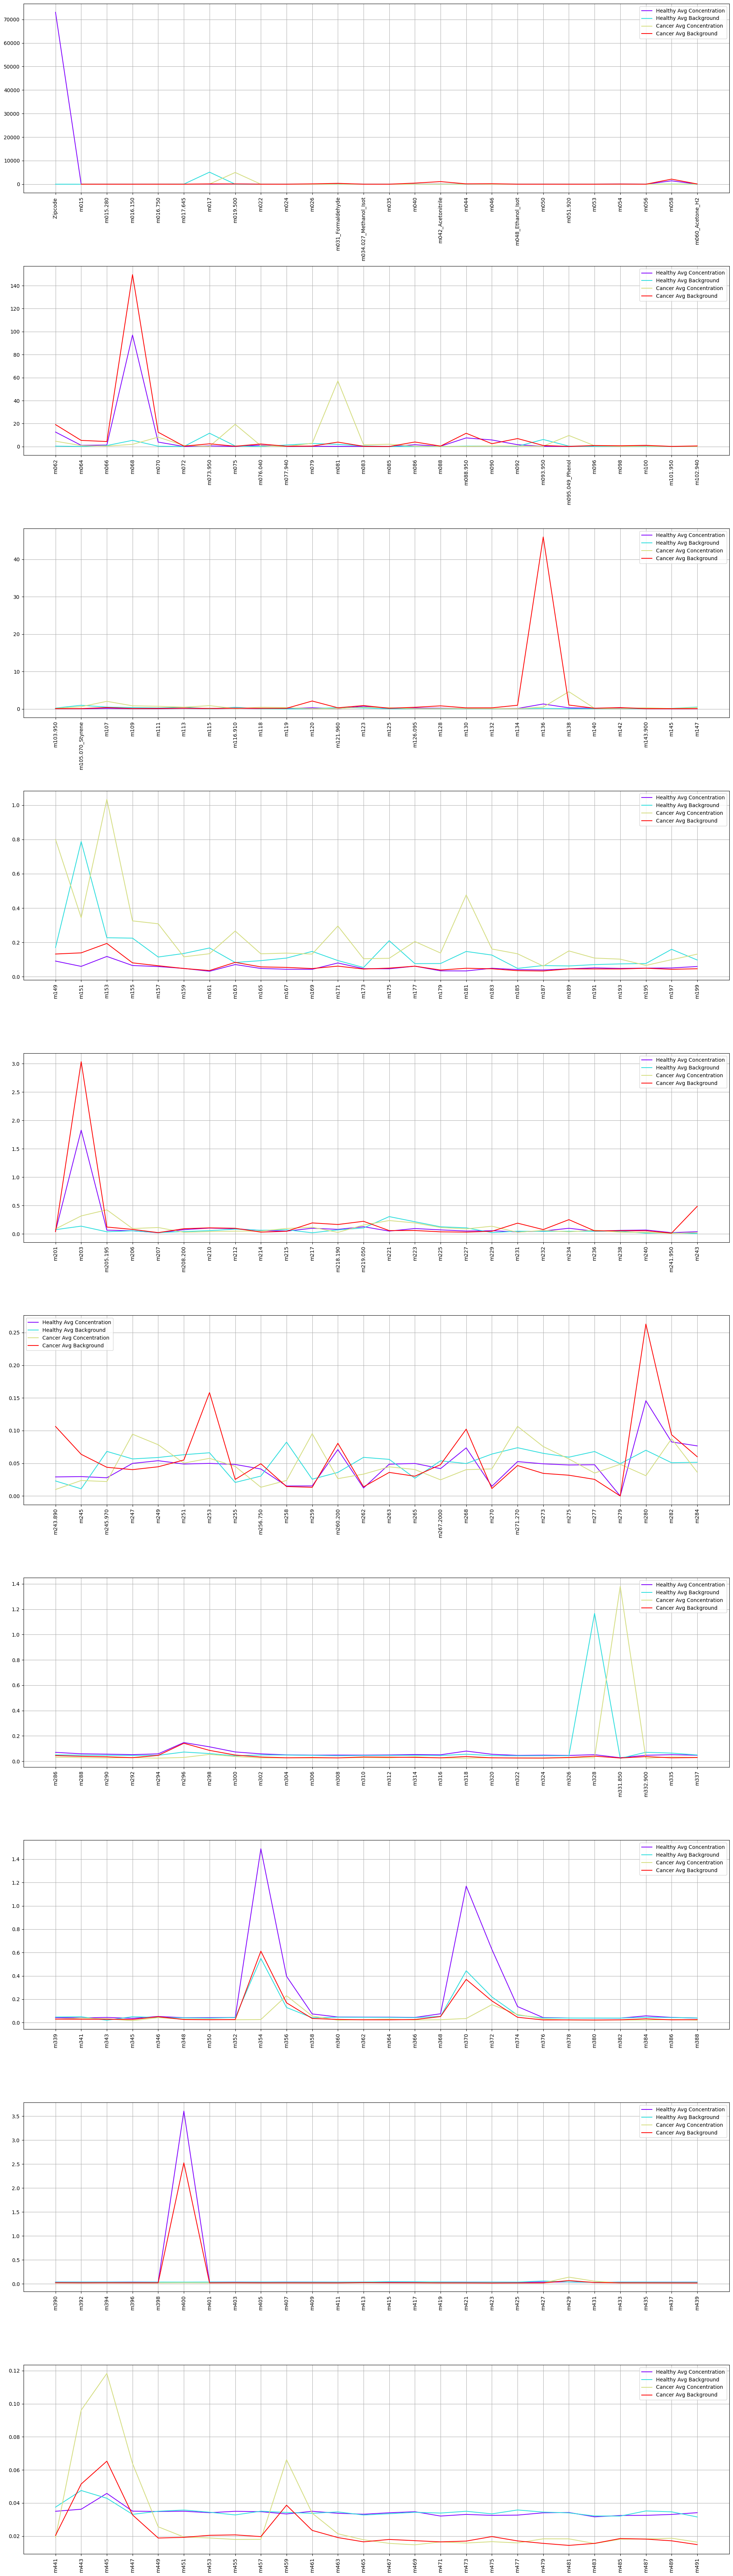

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Your provided file path
file_path = "C:\\Users\\kiran\\Downloads\\Practicum.csv"

# Read the CSV file, skipping the second row
data = pd.read_csv(file_path, skiprows=[1])

# Print the column names to verify their exact names
print("Column names in the dataset:", data.columns.tolist())

# Ensure the column names here match exactly with those in the dataset
cols_to_drop = ['Samples', 'Zipcode', 'Age', 'Gender', 'Nationality', 'Date'] + [col for col in data.columns if col.startswith('r')]
data = data.drop(columns=cols_to_drop, errors='ignore')  # errors='ignore' helps avoid errors if a column is not found

# Convert the remaining columns to numeric where possible, errors='ignore' will keep non-numeric columns unchanged
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='ignore')

# Filter for 'Healthy' and 'Cancer' samples, excluding 'Pos_Neg' for plotting
healthy_data = data[data['Pos_Neg'] == 'Healthy'].drop(columns=['Pos_Neg'])
cancer_data = data[data['Pos_Neg'] == 'Cancer'].drop(columns=['Pos_Neg'])

# Calculate average for each column in the 'Healthy' and 'Cancer' datasets
avg_healthy = healthy_data.mean()
avg_cancer = cancer_data.mean()

# Metadata names are now simply the remaining columns, as 'Pos_Neg', 'Samples', 'Zipcode', 'Age', 'Gender', 'Nationality', and 'Date' are excluded
metadata_names = healthy_data.columns

# Number of plots and calculations for subplots layout
num_plots = 10
pairs_per_plot = len(metadata_names) // (2 * num_plots)

# Generate subplots
fig, axes = plt.subplots(num_plots, 1, figsize=(20, 70))

# Loop through the number of plots for plotting
for i in range(num_plots):
    start_idx = i * pairs_per_plot * 2
    end_idx = start_idx + pairs_per_plot * 2

    # Generate rainbow colors for the lines
    colors = plt.cm.rainbow(np.linspace(0, 1, 4))

    # Plot for each subplot with updated labels and data
    axes[i].plot(avg_healthy[start_idx:end_idx:2].values, color=colors[0], label='Healthy Avg Concentration')
    axes[i].plot(avg_healthy[start_idx + 1:end_idx:2].values, color=colors[1], label='Healthy Avg Background')
    axes[i].plot(avg_cancer[start_idx:end_idx:2].values, color=colors[2], label='Cancer Avg Concentration')
    axes[i].plot(avg_cancer[start_idx + 1:end_idx:2].values, color=colors[3], label='Cancer Avg Background')

    # Set metadata names as x-axis labels, rotating them for better readability
    axes[i].set_xticks(np.arange(pairs_per_plot))
    axes[i].set_xticklabels(metadata_names[start_idx:end_idx:2], rotation=90)
    
    # Add legend and grid to each subplot
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [12]:
# Filter the dataset for rows where 'Pos_Neg' is either "Healthy" or "Covid"
filtered_data = selected_columns_with_info[(selected_columns_with_info['Pos_Neg'] == 'Healthy') | (
    selected_columns_with_info['Pos_Neg'] == 'Covid')]

filtered_data  # Displaying the first few rows of the filtered dataset

Samples  Pos_Neg      m023      m024  m033_Methanol  \
0      BB100  Healthy  1.590810  1.020350      352.49100   
1      BB104  Healthy  2.326547  1.487771      364.10710   
2      BB105  Healthy  2.347437  1.675582      164.50294   
3      BB106  Healthy  2.614369  1.716040      622.03540   
4      BB107  Healthy  2.446289  1.498591      292.41983   
..       ...      ...       ...       ...            ...   
213  Covid46    Covid  2.355917  1.263386      334.69348   
214  Covid47    Covid  1.975796  1.382842      206.61171   
215  Covid48    Covid  2.215475  1.532871      242.77010   
216  Covid49    Covid  2.668329  1.301251      148.19850   
217  Covid50    Covid  2.146431  1.246325      191.21077   

     m034.027_Methanol_Isot  m034.995_H2S      m035      m036  \
0                  4.682102      0.227659  0.894753  0.607673   
1                  4.804621      0.187809  0.946020  0.902298   
2                  2.716097      0.251564  0.487552  0.933328   
3                  7.697475      0.222011  1.467371  1.093977   
4                  4.193548      0.336132  0.846603  0.905637   
..                      ...           ...       ...       ...   
213                4.018489      0.197514  1.038258  0.910793   
214                3.043121      0.142561  0.620594  1.045869   
215                3.289665      0.211579  0.704287  1.356484   
216                2.151292      0.522836  0.564371  1.042602   
217                2.507961      0.218205  0.637953  1.046702   

     m049_Methanethiol  ...  m332.850  m332.900      m335      m371      m372  \
0             0.563695  ...  0.019350  0.021495  0.032276  0.120754  0.058110   
1             0.348686  ...  0.032206  0.018367  0.039121  0.331205  0.117434   
2             0.840101  ...  0.036017  0.016639  0.052599  0.563775  0.202713   
3             1.096143  ...  0.018766  0.023178  0.069709  0.291503  0.144669   
4             0.755844  ...  0.030411  0.037488  0.056241  0.357743  0.183416   
..                 ...  ...       ...       ...       ...       ...       ...   
213           1.586811  ...  0.038811  0.046107  0.029122  0.891055  0.279098   
214           2.420317  ...  0.021347  0.016583  0.026156  0.873213  0.298775   
215           1.774648  ...  0.029846  0.027470  0.032430  2.531869  0.926146   
216           3.280635  ...  0.035730  0.023911  0.026273  1.142284  0.421544   
217           1.190429  ...  0.030855  0.016662  0.028414  0.993783  0.341681   

         m373      m374      m375      m376      m385  
0    0.073083  0.028000  0.032295  0.025864  0.034377  
1    0.190904  0.075945  0.055244  0.041459  0.032208  
2    0.334627  0.126616  0.107149  0.055190  0.047870  
3    0.144810  0.072249  0.063097  0.035006  0.060450  
4    0.227572  0.087258  0.096746  0.063641  0.044835  
..        ...       ...       ...       ...       ...  
213  0.431994  0.162646  0.077648  0.043711  0.145574  
214  0.439112  0.170736  0.068834  0.016608  0.052129  
215  1.320926  0.401201  0.196823  0.089775  0.089966  
216  0.562224  0.157303  0.106977  0.057201  0.059389  
217  0.515008  0.166280  0.121270  0.026101  0.066451  

[218 rows x 151 columns]

In [13]:
# Filter the dataset for rows where 'Samples' starts with "BB" or "Covid"
selected_columns_with_info = filtered_data[filtered_data['Samples'].str.startswith(
    'BB') | filtered_data['Samples'].str.startswith('Covid')]

# Displaying the first few rows of the further filtered dataset
selected_columns_with_info

Samples  Pos_Neg      m023      m024  m033_Methanol  \
0      BB100  Healthy  1.590810  1.020350      352.49100   
1      BB104  Healthy  2.326547  1.487771      364.10710   
2      BB105  Healthy  2.347437  1.675582      164.50294   
3      BB106  Healthy  2.614369  1.716040      622.03540   
4      BB107  Healthy  2.446289  1.498591      292.41983   
..       ...      ...       ...       ...            ...   
213  Covid46    Covid  2.355917  1.263386      334.69348   
214  Covid47    Covid  1.975796  1.382842      206.61171   
215  Covid48    Covid  2.215475  1.532871      242.77010   
216  Covid49    Covid  2.668329  1.301251      148.19850   
217  Covid50    Covid  2.146431  1.246325      191.21077   

     m034.027_Methanol_Isot  m034.995_H2S      m035      m036  \
0                  4.682102      0.227659  0.894753  0.607673   
1                  4.804621      0.187809  0.946020  0.902298   
2                  2.716097      0.251564  0.487552  0.933328   
3                  7.697475      0.222011  1.467371  1.093977   
4                  4.193548      0.336132  0.846603  0.905637   
..                      ...           ...       ...       ...   
213                4.018489      0.197514  1.038258  0.910793   
214                3.043121      0.142561  0.620594  1.045869   
215                3.289665      0.211579  0.704287  1.356484   
216                2.151292      0.522836  0.564371  1.042602   
217                2.507961      0.218205  0.637953  1.046702   

     m049_Methanethiol  ...  m332.850  m332.900      m335      m371      m372  \
0             0.563695  ...  0.019350  0.021495  0.032276  0.120754  0.058110   
1             0.348686  ...  0.032206  0.018367  0.039121  0.331205  0.117434   
2             0.840101  ...  0.036017  0.016639  0.052599  0.563775  0.202713   
3             1.096143  ...  0.018766  0.023178  0.069709  0.291503  0.144669   
4             0.755844  ...  0.030411  0.037488  0.056241  0.357743  0.183416   
..                 ...  ...       ...       ...       ...       ...       ...   
213           1.586811  ...  0.038811  0.046107  0.029122  0.891055  0.279098   
214           2.420317  ...  0.021347  0.016583  0.026156  0.873213  0.298775   
215           1.774648  ...  0.029846  0.027470  0.032430  2.531869  0.926146   
216           3.280635  ...  0.035730  0.023911  0.026273  1.142284  0.421544   
217           1.190429  ...  0.030855  0.016662  0.028414  0.993783  0.341681   

         m373      m374      m375      m376      m385  
0    0.073083  0.028000  0.032295  0.025864  0.034377  
1    0.190904  0.075945  0.055244  0.041459  0.032208  
2    0.334627  0.126616  0.107149  0.055190  0.047870  
3    0.144810  0.072249  0.063097  0.035006  0.060450  
4    0.227572  0.087258  0.096746  0.063641  0.044835  
..        ...       ...       ...       ...       ...  
213  0.431994  0.162646  0.077648  0.043711  0.145574  
214  0.439112  0.170736  0.068834  0.016608  0.052129  
215  1.320926  0.401201  0.196823  0.089775  0.089966  
216  0.562224  0.157303  0.106977  0.057201  0.059389  
217  0.515008  0.166280  0.121270  0.026101  0.066451  

[218 rows x 151 columns]

In [14]:
from scipy.stats import ranksums


healthy_data = selected_columns_with_info[selected_columns_with_info['Pos_Neg'] == 'Healthy']
covid_data = selected_columns_with_info[selected_columns_with_info['Pos_Neg'] == 'Covid']


wilcoxon_results = []


for column in selected_columns_with_info.columns[2:]:

    stat, p_value = ranksums(healthy_data[column], covid_data[column])

    wilcoxon_results.append((column, stat, p_value))


wilcoxon_results_df = pd.DataFrame(wilcoxon_results, columns=[
                                   'Measurement', 'Statistic', 'P-Value'])


wilcoxon_results_df

Measurement  Statistic       P-Value
0                      m023  -0.377999  7.054313e-01
1                      m024   2.229683  2.576848e-02
2             m033_Methanol   2.548939  1.080512e-02
3    m034.027_Methanol_Isot   3.596098  3.230255e-04
4              m034.995_H2S  -2.084103  3.715084e-02
..                      ...        ...           ...
144                    m373  -7.304575  2.781444e-13
145                    m374  -7.000643  2.547896e-12
146                    m375  -6.259970  3.850522e-10
147                    m376  -0.860714  3.893956e-01
148                    m385  -4.579407  4.662968e-06

[149 rows x 3 columns]

In [15]:

significant_columns = wilcoxon_results_df[wilcoxon_results_df['P-Value'] < 0.05]


significant_measurement_columns = significant_columns['Measurement'].tolist()


final_significant_data = selected_columns_with_info[[
    'Samples', 'Pos_Neg'] + significant_measurement_columns]


final_significant_data

Samples  Pos_Neg      m024  m033_Methanol  m034.027_Methanol_Isot  \
0      BB100  Healthy  1.020350      352.49100                4.682102   
1      BB104  Healthy  1.487771      364.10710                4.804621   
2      BB105  Healthy  1.675582      164.50294                2.716097   
3      BB106  Healthy  1.716040      622.03540                7.697475   
4      BB107  Healthy  1.498591      292.41983                4.193548   
..       ...      ...       ...            ...                     ...   
213  Covid46    Covid  1.263386      334.69348                4.018489   
214  Covid47    Covid  1.382842      206.61171                3.043121   
215  Covid48    Covid  1.532871      242.77010                3.289665   
216  Covid49    Covid  1.301251      148.19850                2.151292   
217  Covid50    Covid  1.246325      191.21077                2.507961   

     m034.995_H2S      m035      m036  m049_Methanethiol  \
0        0.227659  0.894753  0.607673           0.563695   
1        0.187809  0.946020  0.902298           0.348686   
2        0.251564  0.487552  0.933328           0.840101   
3        0.222011  1.467371  1.093977           1.096143   
4        0.336132  0.846603  0.905637           0.755844   
..            ...       ...       ...                ...   
213      0.197514  1.038258  0.910793           1.586811   
214      0.142561  0.620594  1.045869           2.420317   
215      0.211579  0.704287  1.356484           1.774648   
216      0.522836  0.564371  1.042602           3.280635   
217      0.218205  0.637953  1.046702           1.190429   

     m051_Methanol_H2OCluster  ...      m319  m331.850  m332.850      m335  \
0                    4.474844  ...  0.042976  1.147852  0.019350  0.032276   
1                   10.577737  ...  0.043748  1.036022  0.032206  0.039121   
2                    4.808905  ...  0.059573  1.087674  0.036017  0.052599   
3                   17.253494  ...  0.046554  1.238321  0.018766  0.069709   
4                    6.990293  ...  0.056668  1.304798  0.030411  0.056241   
..                        ...  ...       ...       ...       ...       ...   
213                  6.190477  ...  0.029153  1.602298  0.038811  0.029122   
214                  3.617987  ...  0.026090  1.561785  0.021347  0.026156   
215                  4.128990  ...  0.019874  1.527450  0.029846  0.032430   
216                  2.895761  ...  0.026163  1.556060  0.035730  0.026273   
217                  3.633768  ...  0.035496  1.515315  0.030855  0.028414   

         m371      m372      m373      m374      m375      m385  
0    0.120754  0.058110  0.073083  0.028000  0.032295  0.034377  
1    0.331205  0.117434  0.190904  0.075945  0.055244  0.032208  
2    0.563775  0.202713  0.334627  0.126616  0.107149  0.047870  
3    0.291503  0.144669  0.144810  0.072249  0.063097  0.060450  
4    0.357743  0.183416  0.227572  0.087258  0.096746  0.044835  
..        ...       ...       ...       ...       ...       ...  
213  0.891055  0.279098  0.431994  0.162646  0.077648  0.145574  
214  0.873213  0.298775  0.439112  0.170736  0.068834  0.052129  
215  2.531869  0.926146  1.320926  0.401201  0.196823  0.089966  
216  1.142284  0.421544  0.562224  0.157303  0.106977  0.059389  
217  0.993783  0.341681  0.515008  0.166280  0.121270  0.066451  

[218 rows x 139 columns]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(final_significant_data['Pos_Neg'])

# Feature matrix
X = final_significant_data.iloc[:, 2:]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the Lasso model
lasso = Lasso(alpha=0.1, max_iter=1000, tol=0.0001)
lasso.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso.predict(X_test_scaled)

# Mean Squared Error for Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Initialize and fit the Ridge model
ridge = Ridge(alpha=0.1, max_iter=1000, tol=0.0001)
ridge.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test_scaled)

# Mean Squared Error for Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Initialize and fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test_scaled)

# Mean Squared Error for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)

(mse_lasso, mse_ridge, mse_linear)


(0.03579915774389999, 0.06033288678324003, 0.0487662303886306)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming final_significant_data is defined

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(final_significant_data['Pos_Neg'])

# Feature matrix
X = final_significant_data.iloc[:, 2:]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
lasso = Lasso(alpha=0.1, max_iter=1000, tol=0.0001)
ridge = Ridge(alpha=0.1, max_iter=1000, tol=0.0001)
linear_reg = LinearRegression()
svr = SVR(kernel='rbf')
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
xgboost = XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)

models = {
    'Lasso': lasso,
    'Ridge': ridge,
    'Linear Regression': linear_reg,
    'SVR': svr,
    'Random Forest': random_forest,
    'XGBoost': xgboost
}

# Train, predict, and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print(f"{name} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")


Lasso - MSE: 0.0358, RMSE: 0.1892, MAE: 0.1276, R^2: 0.7962
Ridge - MSE: 0.0603, RMSE: 0.2456, MAE: 0.1286, R^2: 0.6565
Linear Regression - MSE: 0.0488, RMSE: 0.2208, MAE: 0.1596, R^2: 0.7223
SVR - MSE: 0.0245, RMSE: 0.1567, MAE: 0.1165, R^2: 0.8603
Random Forest - MSE: 0.0009, RMSE: 0.0306, MAE: 0.0083, R^2: 0.9947
XGBoost - MSE: 0.0000, RMSE: 0.0001, MAE: 0.0001, R^2: 1.0000


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
y_encoded = le.fit_transform(final_significant_data['Pos_Neg'])


X = final_significant_data.iloc[:, 2:]


X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lasso = Lasso(alpha=0.1, max_iter=1000, tol=0.0001)
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)

mse

0.03579915774389999

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Assuming final_significant_data is already defined and available
le = LabelEncoder()
y_encoded = le.fit_transform(final_significant_data['Pos_Neg'])

X = final_significant_data.iloc[:, 2:]

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of alphas to iterate over
lasso_alphas = [.00001, .0001, .001, .01, .1]

# Dictionary to store MSE for each alpha
mse_scores = {}

for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha, max_iter=1000, tol=0.0001)
    lasso.fit(X_train_scaled, y_train)
    
    y_pred = lasso.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[alpha] = mse
    print(f"MSE for alpha={alpha}: {mse}")

# If you want to find the best alpha and its corresponding MSE
best_alpha = min(mse_scores, key=mse_scores.get)
best_mse = mse_scores[best_alpha]
print(f"Best alpha: {best_alpha}, with MSE: {best_mse}")


MSE for alpha=1e-05: 0.12019905682986005
MSE for alpha=0.0001: 0.011042259130021109
MSE for alpha=0.001: 0.010418173994875539
MSE for alpha=0.01: 0.015206143955419927
MSE for alpha=0.1: 0.03579915774389999
Best alpha: 0.001, with MSE: 0.010418173994875539


c:\Users\kiran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.145e-02, tolerance: 2.694e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\kiran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.960e-02, tolerance: 2.694e-03
  model = cd_fast.enet_coordinate_descent(


These lists indicate that both Linear and Ridge regression models consider all the features to have some level of significance, with none being completely discarded, unlike the Lasso model which zeroes out certain coefficients to perform feature selection

In [20]:
# Coefficients for the Linear Regression model
linear_coefficients = linear_reg.coef_

# Coefficients for the Ridge Regression model
ridge_coefficients = ridge.coef_

# Extract non-zero coefficients for Linear Regression (all coefficients are typically non-zero)
non_zero_coefficients_linear = [column for coefficient, column in zip(linear_coefficients, X.columns) if coefficient != 0]

# Extract non-zero coefficients for Ridge Regression (all coefficients are typically non-zero, but may be shrunk towards zero)
non_zero_coefficients_ridge = [column for coefficient, column in zip(ridge_coefficients, X.columns) if coefficient != 0]

(non_zero_coefficients_linear, non_zero_coefficients_ridge)


(['m024',
  'm033_Methanol',
  'm034.027_Methanol_Isot',
  'm034.995_H2S',
  'm035',
  'm036',
  'm049_Methanethiol',
  'm051_Methanol_H2OCluster',
  'm053',
  'm054',
  'm055_Butadiene',
  'm058',
  'm061',
  'm062',
  'm063',
  'm065',
  'm066',
  'm067',
  'm068',
  'm069_Isoprene',
  'm070',
  'm071',
  'm072',
  'm074',
  'm076.040',
  'm077',
  'm080',
  'm081',
  'm082',
  'm083',
  'm084',
  'm085',
  'm086',
  'm087',
  'm088.070',
  'm089',
  'm090',
  'm093.950',
  'm094',
  'm095.049_Phenol',
  'm095.950',
  'm096',
  'm097.071_Cycloheptene',
  'm098',
  'm099',
  'm100',
  'm103',
  'm103.950',
  'm104',
  'm109',
  'm110',
  'm111',
  'm112',
  'm113',
  'm114',
  'm115',
  'm116',
  'm117',
  'm118',
  'm119',
  'm119.950',
  'm120',
  'm121.960',
  'm123',
  'm124',
  'm125.960',
  'm126.095',
  'm127',
  'm128',
  'm129',
  'm130',
  'm131',
  'm132',
  'm133',
  'm134',
  'm137',
  'm138',
  'm139',
  'm140',
  'm141',
  'm142',
  'm143',
  'm143.900',
  'm144',
  'm1

In [21]:

lasso_coefficients = lasso.coef_


non_zero_coefficients = [column for coefficient, column in zip(
    lasso_coefficients, X.columns) if coefficient != 0]


non_zero_coefficients

['m115', 'm119', 'm131', 'm133', 'm205.195', 'm271.270']

In [43]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train_scaled, y_train are defined from your previous code block

# Initialize and fit the Random Forest and XGBoost models
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
xgboost = XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)

random_forest.fit(X_train_scaled, y_train)
xgboost.fit(X_train_scaled, y_train)

# Get feature importances
rf_feature_importances = random_forest.feature_importances_
xgb_feature_importances = xgboost.feature_importances_

# Identify non-zero (significant) features for Random Forest and XGBoost
rf_significant_features = [column for importance, column in zip(rf_feature_importances, X.columns) if importance > 0]
xgb_significant_features = [column for importance, column in zip(xgb_feature_importances, X.columns) if importance > 0]

print("Random Forest Significant Features:", rf_significant_features)
print("XGBoost Significant Features:", xgb_significant_features)


Random Forest Significant Features: ['m131', 'm205.195', 'm271.270']
XGBoost Significant Features: ['m115', 'm119', 'm131', 'm205.195', 'm271.270']


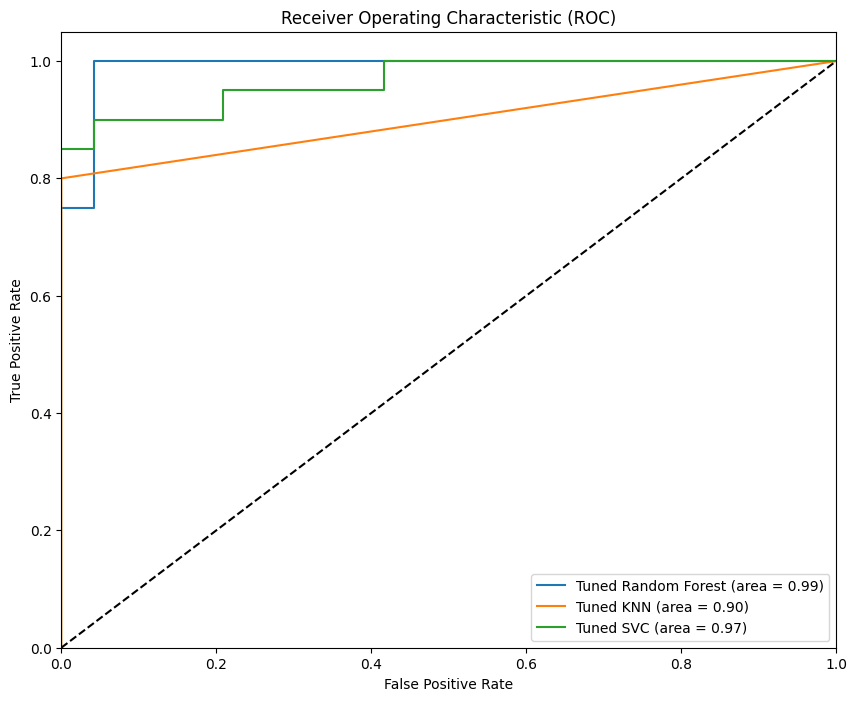

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Best parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


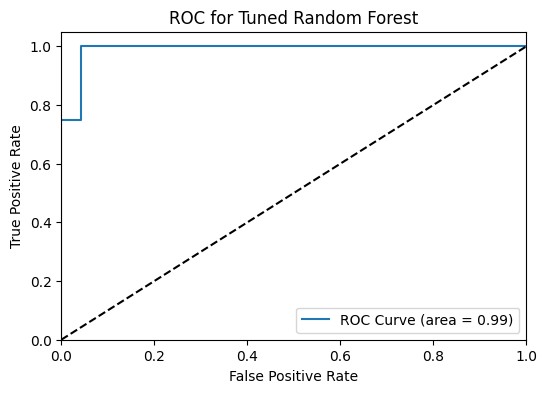

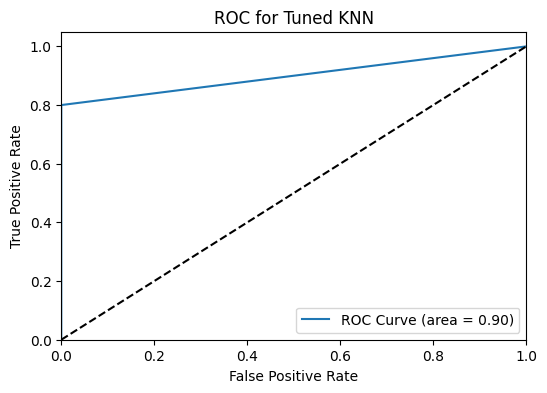

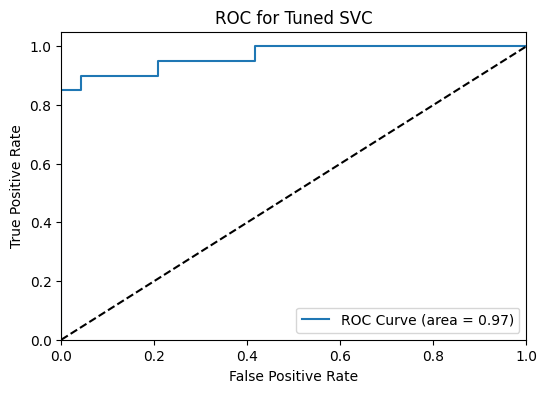

           Model  Accuracy  Precision  Recall  F1 Score  ROC AUC Score
0  Random Forest  0.886364        1.0    0.75  0.857143       0.989583
1            KNN  0.863636        1.0    0.70  0.823529       0.900000
2            SVC  0.863636        1.0    0.70  0.823529       0.966667


In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\kiran\Downloads\Breathonix All data2 - Copy.csv"
data = pd.read_csv(file_path)

# Filter columns that contain the relevant feature identifiers
relevant_features = ['m115', 'm119', 'm131', 'm133', 'm205.195', 'm271.270']
filtered_columns = [col for col in data.columns if any(feature in col for feature in relevant_features)]

# Create a new dataframe with only the relevant features
filtered_data = data[filtered_columns]

# Since the first row contains 'Concentration' and 'Background', remove it
filtered_data = filtered_data.drop(0).reset_index(drop=True)

# Convert data to numeric
filtered_data = filtered_data.apply(pd.to_numeric, errors='coerce')

# Label samples based on the 75th percentile threshold
percentiles = filtered_data[relevant_features].quantile(0.75)

def label_sample(row):
    for feature in relevant_features:
        if row[feature] > percentiles[feature]:
            return 1  # Label as COVID
    return 0  # Label as healthy

filtered_data['Label'] = filtered_data.apply(label_sample, axis=1)

# Splitting the data
X = filtered_data[relevant_features]
y = filtered_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter grids for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Grid search for each classifier
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_svc = GridSearchCV(SVC(probability=True), param_grid_svc, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit grid search and find the best estimator
best_rf = grid_search_rf.fit(X_train, y_train).best_estimator_
best_knn = grid_search_knn.fit(X_train, y_train).best_estimator_
best_svc = grid_search_svc.fit(X_train, y_train).best_estimator_

# Predict probabilities using the best estimators
probs_rf = best_rf.predict_proba(X_test)[:, 1]
probs_knn = best_knn.predict_proba(X_test)[:, 1]
probs_svc = best_svc.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_rf)
roc_auc_rf = roc_auc_score(y_test, probs_rf)

fpr_knn, tpr_knn, _ = roc_curve(y_test, probs_knn)
roc_auc_knn = roc_auc_score(y_test, probs_knn)

fpr_svc, tpr_svc, _ = roc_curve(y_test, probs_svc)
roc_auc_svc = roc_auc_score(y_test, probs_svc)

# Plotting ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Tuned Random Forest (area = {roc_auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'Tuned KNN (area = {roc_auc_knn:.2f})')
plt.plot(fpr_svc, tpr_svc, label=f'Tuned SVC (area = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random predictions line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Extracting best hyperparameters
best_params_rf = grid_search_rf.best_params_
best_params_knn = grid_search_knn.best_params_
best_params_svc = grid_search_svc.best_params_
print("Best parameters for Random Forest:", best_params_rf)
print("Best parameters for KNN:", best_params_knn)
print("Best parameters for SVC:", best_params_svc)

# Individual ROC Curves Plotting
# Random Forest
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f'ROC Curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Tuned Random Forest')
plt.legend(loc='lower right')
plt.show()

# KNN
plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, label=f'ROC Curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Tuned KNN')
plt.legend(loc='lower right')
plt.show()

# SVC
plt.figure(figsize=(6, 4))
plt.plot(fpr_svc, tpr_svc, label=f'ROC Curve (area = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Tuned SVC')
plt.legend(loc='lower right')
plt.show()

# Calculating metrics
metrics_df = pd.DataFrame({
    'Model': ['Random Forest', 'KNN', 'SVC'],
    'Accuracy': [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_svc)],
    'Precision': [precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_svc)],
    'Recall': [recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_svc)],
    'F1 Score': [f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_svc)],
    'ROC AUC Score': [
        roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, best_svc.decision_function(X_test))  # Use decision_function for SVC
    ]
})

print(metrics_df)



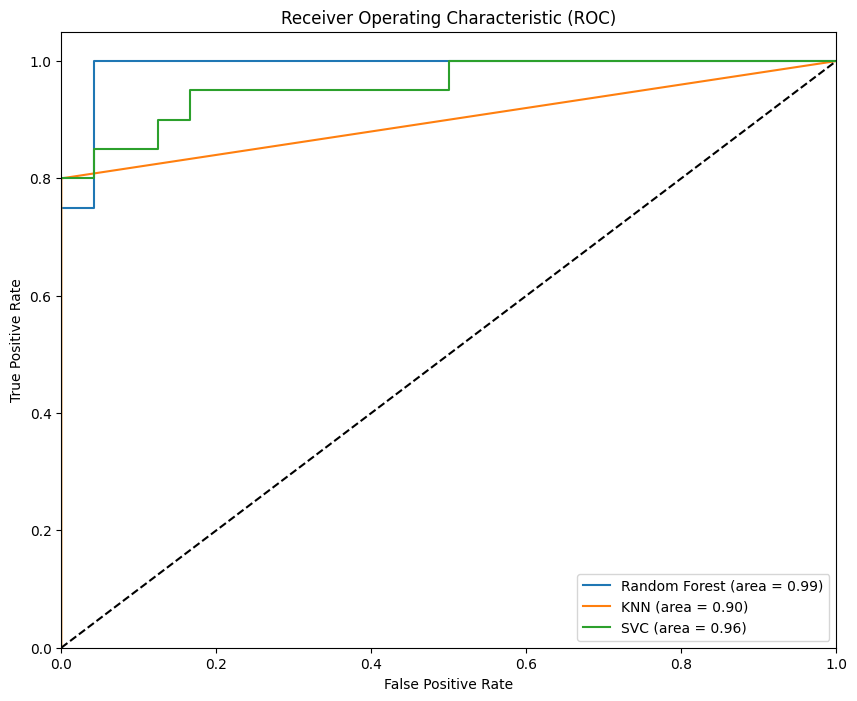

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\kiran\Downloads\Breathonix All data2 - Copy.csv"
data = pd.read_csv(file_path)

# Filter columns that contain the relevant feature identifiers
relevant_features = ['m115', 'm119', 'm131', 'm133', 'm205.195', 'm271.270']
filtered_columns = [col for col in data.columns if any(feature in col for feature in relevant_features)]

# Create a new dataframe with only the relevant features
filtered_data = data[filtered_columns]

# Since the first row contains 'Concentration' and 'Background', remove it
filtered_data = filtered_data.drop(0).reset_index(drop=True)

# Convert data to numeric
filtered_data = filtered_data.apply(pd.to_numeric, errors='coerce')

# Label samples based on the 75th percentile threshold
percentiles = filtered_data[relevant_features].quantile(0.75)

def label_sample(row):
    for feature in relevant_features:
        if row[feature] > percentiles[feature]:
            return 1  # Label as COVID
    return 0  # Label as healthy

filtered_data['Label'] = filtered_data.apply(label_sample, axis=1)

# Splitting the data
X = filtered_data[relevant_features]
y = filtered_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_svc = SVC(kernel='linear', probability=True)  # Ensure probability is True for ROC curve

# Train classifiers and predict probabilities
probs_rf = clf_rf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
probs_knn = clf_knn.fit(X_train, y_train).predict_proba(X_test)[:, 1]
probs_svc = clf_svc.fit(X_train, y_train).predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_rf)
roc_auc_rf = roc_auc_score(y_test, probs_rf)

fpr_knn, tpr_knn, _ = roc_curve(y_test, probs_knn)
roc_auc_knn = roc_auc_score(y_test, probs_knn)

fpr_svc, tpr_svc, _ = roc_curve(y_test, probs_svc)
roc_auc_svc = roc_auc_score(y_test, probs_svc)

# Plotting ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (area = {roc_auc_knn:.2f})')
plt.plot(fpr_svc, tpr_svc, label=f'SVC (area = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random predictions line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


Epoch 1/100
14/14 [==============================] - 2s 31ms/step - loss: 0.7016 - accuracy: 0.6259 - val_loss: 0.6623 - val_accuracy: 0.7714
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6291 - accuracy: 0.8993 - val_loss: 0.5789 - val_accuracy: 0.9143
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.5668 - accuracy: 0.9281 - val_loss: 0.5185 - val_accuracy: 0.9143
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 0.5109 - accuracy: 0.9281 - val_loss: 0.4608 - val_accuracy: 0.9143
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4577 - accuracy: 0.9209 - val_loss: 0.4051 - val_accuracy: 0.9143
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4020 - accuracy: 0.9137 - val_loss: 0.3558 - val_accuracy: 0.9143
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3582 - accuracy: 0.9065 - val_loss: 0.3161 - val_accuracy: 0.9143
Epoch 8/100


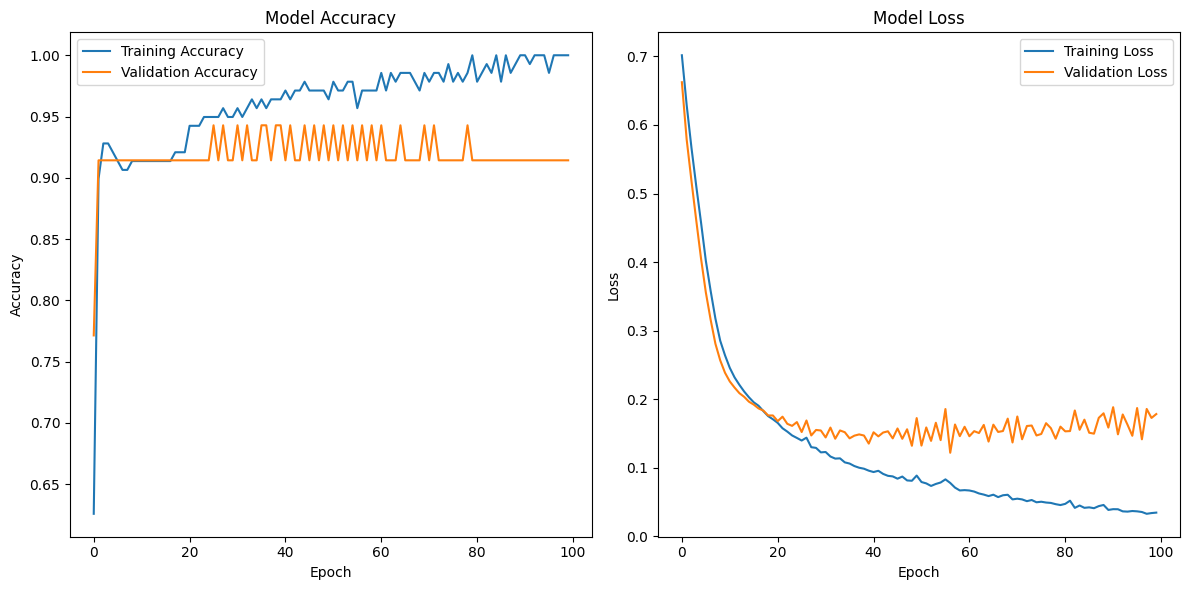

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the dataset
file_path = r"C:\Users\kiran\Downloads\Breathonix All data2 - Copy.csv"
data = pd.read_csv(file_path)

# Filter columns that contain the relevant feature identifiers
relevant_features = ['m115', 'm119', 'm131', 'm133', 'm205.195', 'm271.270']
filtered_columns = [col for col in data.columns if any(feature in col for feature in relevant_features)]

# Create a new dataframe with only the relevant features
filtered_data = data[filtered_columns]

# Since the first row contains 'Concentration' and 'Background', remove it
filtered_data = filtered_data.drop(0).reset_index(drop=True)

# Convert data to numeric
filtered_data = filtered_data.apply(pd.to_numeric, errors='coerce')

# Label samples based on the 75th percentile threshold
percentiles = filtered_data[relevant_features].quantile(0.75)

def label_sample(row):
    for feature in relevant_features:
        if row[feature] > percentiles[feature]:
            return 1  # Label as COVID
    return 0  # Label as healthy

filtered_data['Label'] = filtered_data.apply(label_sample, axis=1)

# Splitting the data
X = filtered_data[relevant_features]
y = filtered_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define the FCNN model
model = Sequential([
    Dense(64, input_dim=len(relevant_features), activation='relu'),  # First hidden layer with 64 neurons and 'relu' activation
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(2, activation='softmax')  # Output layer with 'softmax' activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

# Evaluate the model on the test data
scores = model.evaluate(X_test, y_test_cat, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# Generate predictions (probabilities -- the output of the last layer)
# Convert them to class predictions based on the threshold value
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

# Accuracy and ROC AUC Score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, predictions[:, 1]))

# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = r"C:\Users\kiran\Downloads\Breathonix All data2 - Copy.csv"
data = pd.read_csv(file_path)

# Filter columns that contain the relevant feature identifiers
relevant_features = ['m115', 'm119', 'm131', 'm133', 'm205.195', 'm271.270']
filtered_columns = [col for col in data.columns if any(feature in col for feature in relevant_features)]

# Create a new dataframe with only the relevant features
filtered_data = data[filtered_columns]

# Since the first row contains 'Concentration' and 'Background', remove it
filtered_data = filtered_data.drop(0).reset_index(drop=True)

# Convert data to numeric
filtered_data = filtered_data.apply(pd.to_numeric, errors='coerce')

# Label samples based on the 75th percentile threshold
percentiles = filtered_data[relevant_features].quantile(0.75)

def label_sample(row):
    for feature in relevant_features:
        if row[feature] > percentiles[feature]:
            return 1  # Label as COVID
    return 0  # Label as healthy

filtered_data['Label'] = filtered_data.apply(label_sample, axis=1)

# Splitting the data
X = filtered_data[relevant_features]
y = filtered_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

# K-Nearest Neighbors
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
print("K-Nearest Neighbors:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))

# Support Vector Classifier
clf_svc = SVC(kernel='linear')
clf_svc.fit(X_train, y_train)
y_pred_svc = clf_svc.predict(X_test)
print("Support Vector Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc)}")
print(classification_report(y_test, y_pred_svc))


Random Forest Classifier:
Accuracy: 0.8863636363636364
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        24
           1       1.00      0.75      0.86        20

    accuracy                           0.89        44
   macro avg       0.91      0.88      0.88        44
weighted avg       0.91      0.89      0.88        44

K-Nearest Neighbors:
Accuracy: 0.8636363636363636
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        24
           1       1.00      0.70      0.82        20

    accuracy                           0.86        44
   macro avg       0.90      0.85      0.86        44
weighted avg       0.89      0.86      0.86        44

Support Vector Classifier:
Accuracy: 0.8636363636363636
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        24
           1       1.00      0.70      0.82        20

    accuracy         

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = r"C:\Users\kiran\Downloads\Breathonix All data2 - Copy.csv"
data = pd.read_csv(file_path)

# Filter columns that contain the relevant feature identifiers
relevant_features = ['m115', 'm119', 'm131', 'm133', 'm205.195', 'm271.270']
filtered_columns = [col for col in data.columns if any(feature in col for feature in relevant_features)]

# Create a new dataframe with only the relevant features
filtered_data = data[filtered_columns]

# Since the first row contains 'Concentration' and 'Background', remove it
filtered_data = filtered_data.drop(0).reset_index(drop=True)

# Convert data to numeric
filtered_data = filtered_data.apply(pd.to_numeric, errors='coerce')

# Label samples based on the 75th percentile threshold
percentiles = filtered_data[relevant_features].quantile(0.75)

def label_sample(row):
    for feature in relevant_features:
        if row[feature] > percentiles[feature]:
            return 1  # Label as COVID
    return 0  # Label as healthy

filtered_data['Label'] = filtered_data.apply(label_sample, axis=1)

# Splitting the data
X = filtered_data[relevant_features]
y = filtered_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8863636363636364
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        24
           1       1.00      0.75      0.86        20

    accuracy                           0.89        44
   macro avg       0.91      0.88      0.88        44
weighted avg       0.91      0.89      0.88        44



In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "C:\\Users\\kiran\\Downloads\\Breathonix All data2 - Copy.csv"
data = pd.read_csv(file_path)

# Filter relevant features and remove the first row that contains 'Concentration' and 'Background'
relevant_features = ['m115', 'm119', 'm131', 'm133', 'm205.195', 'm271.270']
filtered_columns = [col for col in data.columns if any(feature in col for feature in relevant_features)]
filtered_data = data[filtered_columns].drop(0).reset_index(drop=True).apply(pd.to_numeric, errors='coerce')

# Labeling the samples based on the 75th percentile of each relevant feature
percentiles = filtered_data[relevant_features].quantile(0.75)
def label_sample(row):
    for feature in relevant_features:
        if row[feature] > percentiles[feature]:
            return 1  # COVID
    return 0  # Healthy
filtered_data['Label'] = filtered_data.apply(label_sample, axis=1)

# Splitting the data into training and testing sets
X = filtered_data.drop('Label', axis=1)
y = filtered_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}\n")
print(f"Classification Report:\n{report}")


Accuracy: 0.8939393939393939

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        40
           1       1.00      0.73      0.84        26

    accuracy                           0.89        66
   macro avg       0.93      0.87      0.88        66
weighted avg       0.91      0.89      0.89        66



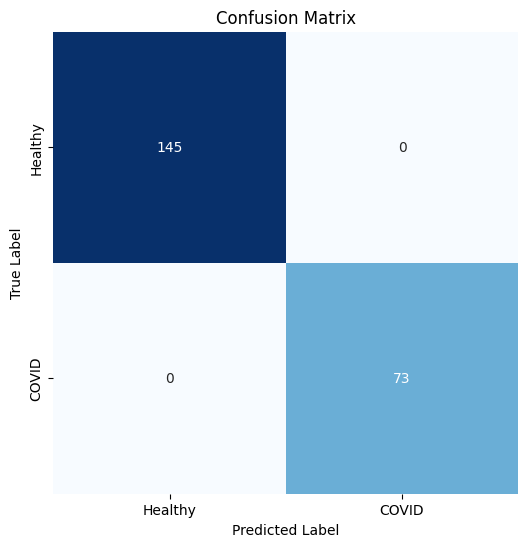

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the dataset
file_path = "C:\\Users\\kiran\\Downloads\\Breathonix All data2 - Copy.csv"  # Update this path for your file
data = pd.read_csv(file_path)

# Filter relevant features and preprocess the data
relevant_features = ['m115', 'm119', 'm131', 'm133', 'm205.195', 'm271.270']
filtered_columns = [col for col in data.columns if any(feature in col for feature in relevant_features)]
filtered_data = data[filtered_columns].drop(0).reset_index(drop=True).apply(pd.to_numeric, errors='coerce')

# Labeling the samples
percentiles = filtered_data[relevant_features].quantile(0.75)
def label_sample(row):
    for feature in relevant_features:
        if row[feature] > percentiles[feature]:
            return 1  # COVID
    return 0  # Healthy
filtered_data['Label'] = filtered_data.apply(label_sample, axis=1)

# Assuming all labels are correct according to the percentile threshold
true_labels = filtered_data['Label']
predicted_labels = filtered_data['Label']  # In this case, predicted labels are the same as true labels

# Generating the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plotting the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False, 
            xticklabels=['Healthy', 'COVID'], yticklabels=['Healthy', 'COVID'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


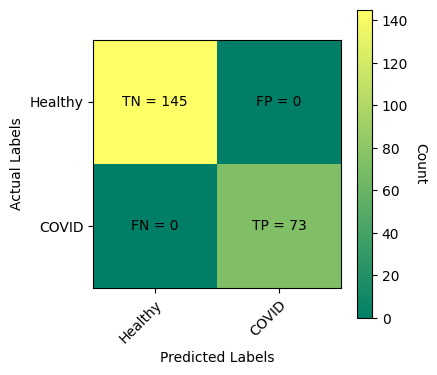

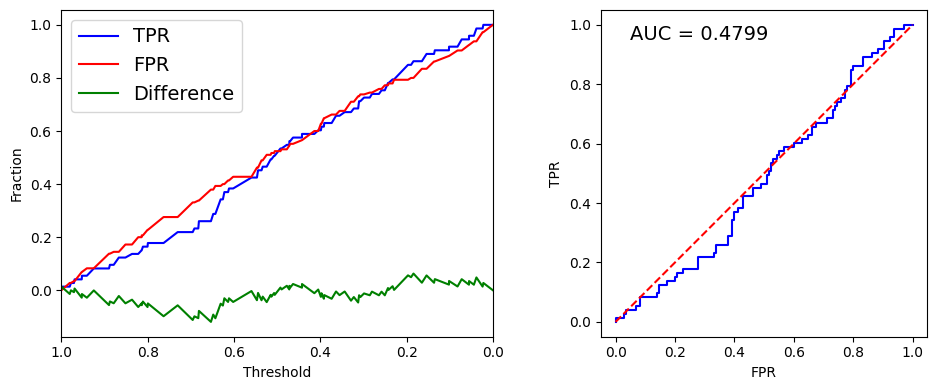

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Load the dataset
file_path = "C:\\Users\\kiran\\Downloads\\Breathonix All data2 - Copy.csv"
data = pd.read_csv(file_path)

# Filter relevant features and preprocess the data
relevant_features = ['m115', 'm119', 'm131', 'm133', 'm205.195', 'm271.270']
filtered_columns = [col for col in data.columns if any(feature in col for feature in relevant_features)]
filtered_data = data[filtered_columns].drop(0).reset_index(drop=True).apply(pd.to_numeric, errors='coerce')

# Labeling the samples
percentiles = filtered_data[relevant_features].quantile(0.75)
def label_sample(row):
    for feature in relevant_features:
        if row[feature] > percentiles[feature]:
            return 1  # COVID
    return 0  # Healthy
filtered_data['Label'] = filtered_data.apply(label_sample, axis=1)

# Assuming all labels are correct according to the percentile threshold
true_labels = filtered_data['Label']
predicted_labels = filtered_data['Label']  # In this case, predicted labels are the same as true labels

# Generating the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Provided function for plotting confusion matrix
def confusion_mtx_colormap(mtx, xnames, ynames, cbarlabel=""):
    nxvars = mtx.shape[1]
    nyvars = mtx.shape[0]
    
    fig, ax = plt.subplots(figsize=(4,4))
    im = ax.imshow(mtx, cmap='summer')
    if not cbarlabel == "":
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    
    ax.set_xticks(range(nxvars))
    ax.set_yticks(range(nyvars))
    ax.set_xticklabels(xnames)
    ax.set_yticklabels(ynames)
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("Actual Labels")

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    lbl = np.array([['TN', 'FP'], ['FN', 'TP']])
    for i in range(nyvars):
        for j in range(nxvars):
            ax.text(j, i, "%s = %d" % (lbl[i,j], mtx[i, j]), ha="center", va="center", color="k")

    return fig, ax

# Provided function for KS and ROC plot
def ks_roc_plot(targets, scores, FIGWIDTH=10, FIGHEIGHT=4, FONTSIZE=14):
    fpr, tpr, thresholds = roc_curve(targets, scores)
    auc_roc = auc(fpr, tpr)

    pos_frac = np.sum(targets) / targets.shape[0]
    
    fig, ax = plt.subplots(1, 2, figsize=(FIGWIDTH, FIGHEIGHT))
    
    ax[0].plot(thresholds, tpr, color='b')
    ax[0].plot(thresholds, fpr, color='r')
    ax[0].plot(thresholds, tpr - fpr, color='g')
    ax[0].set_xlim([0, 1])
    ax[0].invert_xaxis()
    ax[0].set(xlabel='Threshold', ylabel='Fraction')
    ax[0].legend(['TPR', 'FPR', 'Difference'], fontsize=FONTSIZE)
    
    ax[1].plot(fpr, tpr, color='b')
    ax[1].plot([0, 1], [0, 1], 'r--')
    ax[1].set(xlabel='FPR', ylabel='TPR')
    ax[1].set_aspect('equal', 'box')
    ax[1].text(.05, .95, "AUC = %.4f" % auc_roc, color="k", fontsize=FONTSIZE)
    
    plt.tight_layout()
    return fig, ax

# Plotting using the provided function for confusion matrix
confusion_mtx_colormap(cm, ['Healthy', 'COVID'], ['Healthy', 'COVID'], "Count")

# For demonstration: using dummy scores for ROC and KS plot (replace with actual model scores if available)
dummy_scores = np.random.rand(len(true_labels))

# Plotting ROC and KS plot using dummy scores
ks_roc_plot(true_labels, dummy_scores)

plt.show()


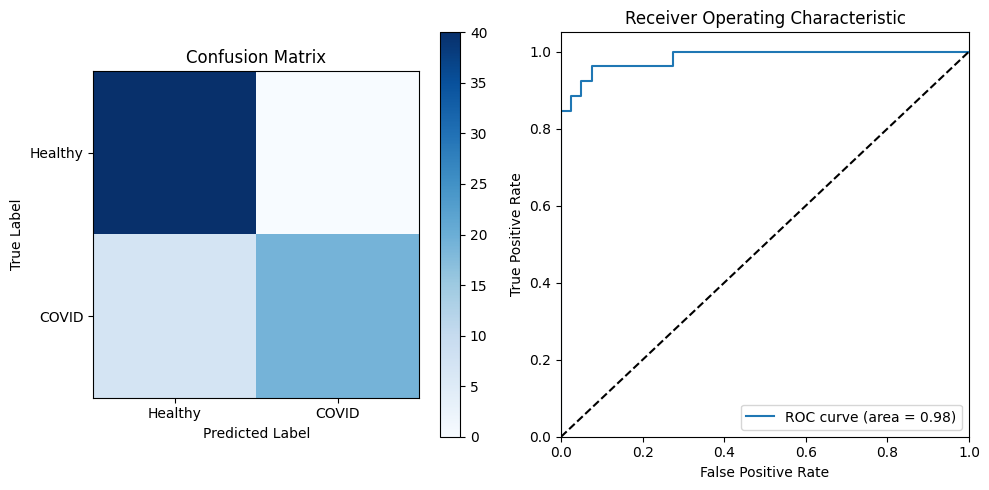

Accuracy: 0.8939393939393939

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        40
           1       1.00      0.73      0.84        26

    accuracy                           0.89        66
   macro avg       0.93      0.87      0.88        66
weighted avg       0.91      0.89      0.89        66



In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\kiran\\Downloads\\Breathonix All data2 - Copy.csv"
data = pd.read_csv(file_path)

# Filter and preprocess the data
relevant_features = ['m115', 'm119', 'm131', 'm133', 'm205.195', 'm271.270']
filtered_columns = [col for col in data.columns if any(feature in col for feature in relevant_features)]
filtered_data = data[filtered_columns].drop(0).reset_index(drop=True).apply(pd.to_numeric, errors='coerce')

# Labeling function
percentiles = filtered_data[relevant_features].quantile(0.75)
def label_sample(row):
    for feature in relevant_features:
        if row[feature] > percentiles[feature]:
            return 1
    return 0
filtered_data['Label'] = filtered_data.apply(label_sample, axis=1)

# Split the data
X = filtered_data.drop('Label', axis=1)
y = filtered_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plotting
plt.figure(figsize=(10, 5))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Healthy', 'COVID'])
plt.yticks(tick_marks, ['Healthy', 'COVID'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# ROC Curve Plot
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

print(f"Accuracy: {accuracy}\n")
print(f"Classification Report:\n{report}")



Model: Random Forest
Accuracy: 0.8939
Confusion Matrix:
[[40  0]
 [ 7 19]]
True Positives (TP): 19
False Positives (FP): 0
True Negatives (TN): 40
False Negatives (FN): 7
ROC AUC: 0.9837
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        40
           1       1.00      0.73      0.84        26

    accuracy                           0.89        66
   macro avg       0.93      0.87      0.88        66
weighted avg       0.91      0.89      0.89        66



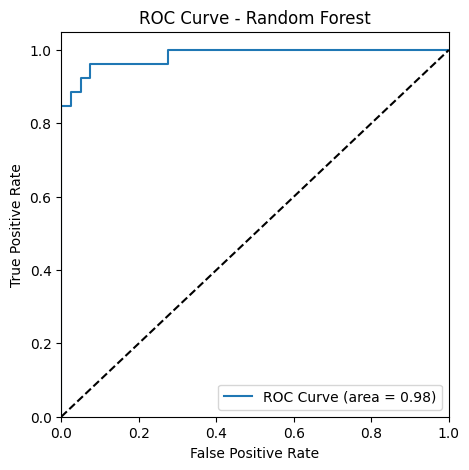


Model: Logistic Regression
Accuracy: 0.8333
Confusion Matrix:
[[40  0]
 [11 15]]
True Positives (TP): 15
False Positives (FP): 0
True Negatives (TN): 40
False Negatives (FN): 11
ROC AUC: 0.9212
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        40
           1       1.00      0.58      0.73        26

    accuracy                           0.83        66
   macro avg       0.89      0.79      0.81        66
weighted avg       0.87      0.83      0.82        66



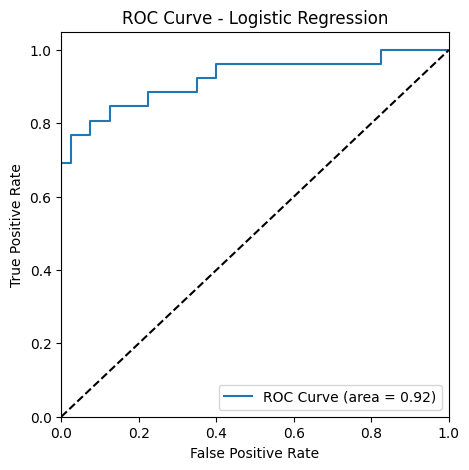


Model: Gradient Boosting
Accuracy: 0.8788
Confusion Matrix:
[[39  1]
 [ 7 19]]
True Positives (TP): 19
False Positives (FP): 1
True Negatives (TN): 39
False Negatives (FN): 7
ROC AUC: 0.9519
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        40
           1       0.95      0.73      0.83        26

    accuracy                           0.88        66
   macro avg       0.90      0.85      0.87        66
weighted avg       0.89      0.88      0.88        66



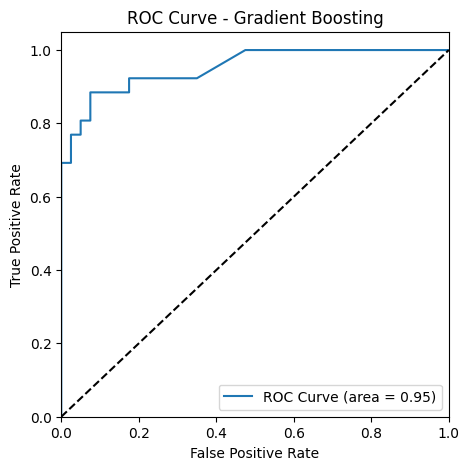

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Load the dataset
file_path = "C:\\Users\\kiran\\Downloads\\Breathonix All data2 - Copy.csv"
data = pd.read_csv(file_path)

# Filter and preprocess the data
relevant_features = ['m115', 'm119', 'm131', 'm133', 'm205.195', 'm271.270']
filtered_columns = [col for col in data.columns if any(feature in col for feature in relevant_features)]
filtered_data = data[filtered_columns].drop(0).reset_index(drop=True).apply(pd.to_numeric, errors='coerce')

# Labeling function
percentiles = filtered_data[relevant_features].quantile(0.75)
def label_sample(row):
    for feature in relevant_features:
        if row[feature] > percentiles[feature]:
            return 1  # COVID
    return 0  # Healthy
filtered_data['Label'] = filtered_data.apply(label_sample, axis=1)

# Split the data
X = filtered_data.drop('Label', axis=1)
y = filtered_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train, predict, and evaluate each model
for name, model in models.items():
    print(f"\nModel: {name}\n{'=' * 40}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    # Extracting TP, FP, FN, TN
    tn, fp, fn, tp = conf_matrix.ravel()

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"True Positives (TP): {tp}")
    print(f"False Positives (FP): {fp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Negatives (FN): {fn}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Plot ROC curve
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()



Model: Random Forest
Accuracy: 0.8939
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        40
           1       1.00      0.73      0.84        26

    accuracy                           0.89        66
   macro avg       0.93      0.87      0.88        66
weighted avg       0.91      0.89      0.89        66



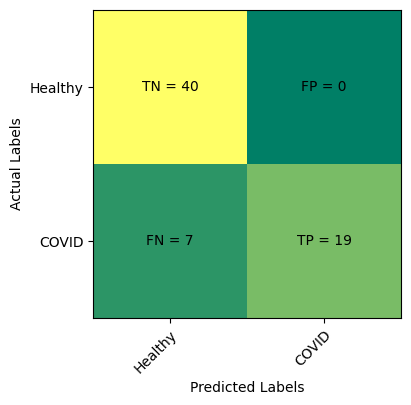

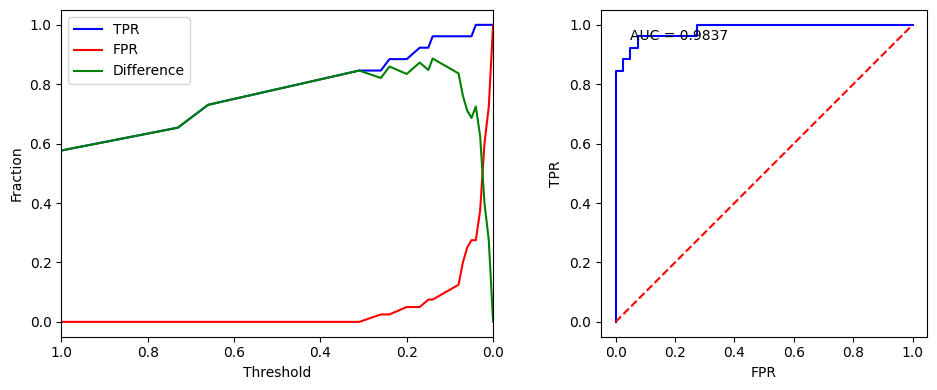


Model: Logistic Regression
Accuracy: 0.8333
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        40
           1       1.00      0.58      0.73        26

    accuracy                           0.83        66
   macro avg       0.89      0.79      0.81        66
weighted avg       0.87      0.83      0.82        66



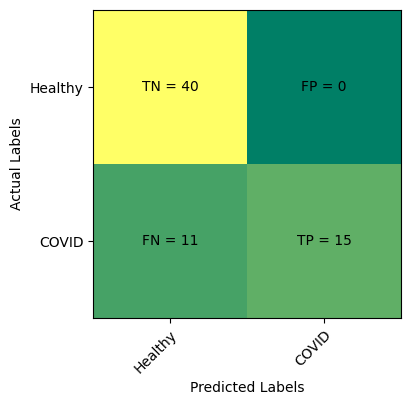

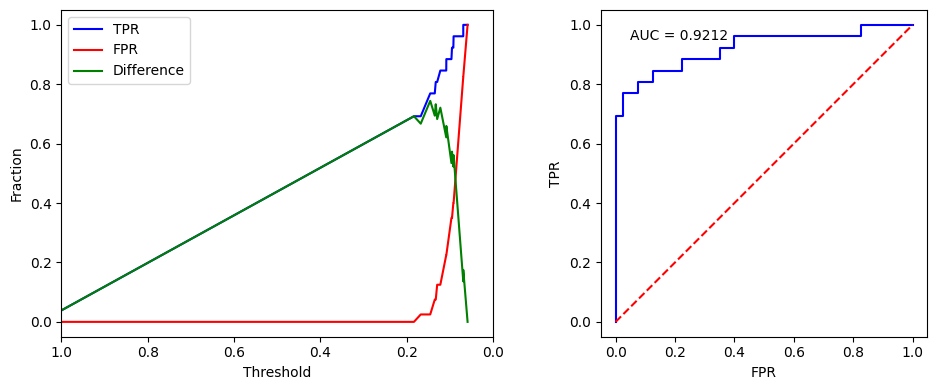


Model: Gradient Boosting
Accuracy: 0.8788
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        40
           1       0.95      0.73      0.83        26

    accuracy                           0.88        66
   macro avg       0.90      0.85      0.87        66
weighted avg       0.89      0.88      0.88        66



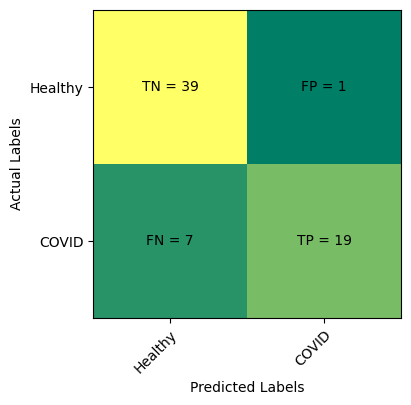

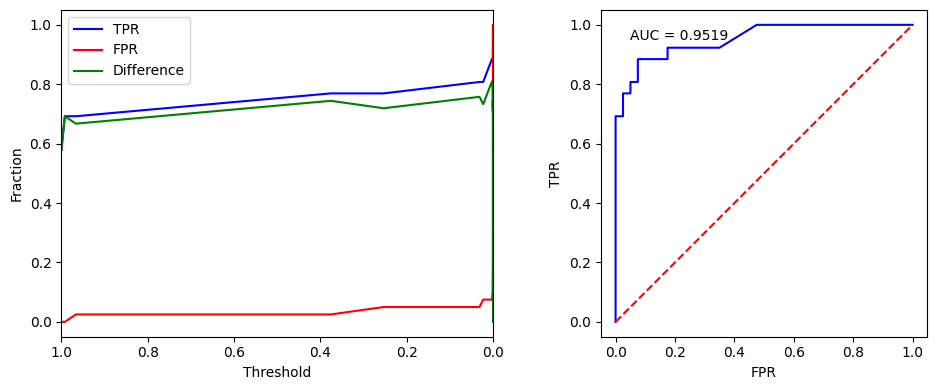

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Provided plotting functions
def confusion_mtx_colormap(mtx, xnames, ynames, cbarlabel=""):
    nxvars = mtx.shape[1]
    nyvars = mtx.shape[0]
    fig, ax = plt.subplots(figsize=(4, 4))
    im = ax.imshow(mtx, cmap='summer')
    if cbarlabel != "":
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    ax.set_xticks(range(nxvars))
    ax.set_yticks(range(nyvars))
    ax.set_xticklabels(xnames)
    ax.set_yticklabels(ynames)
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("Actual Labels")
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    lbl = np.array([['TN', 'FP'], ['FN', 'TP']])
    for i in range(nyvars):
        for j in range(nxvars):
            ax.text(j, i, "%s = %d" % (lbl[i, j], mtx[i, j]), ha="center", va="center", color="k")
    plt.show()

def ks_roc_plot(targets, scores):
    fpr, tpr, thresholds = roc_curve(targets, scores)
    auc_roc = auc(fpr, tpr)
    pos_frac = np.sum(targets) / targets.shape[0]
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].plot(thresholds, tpr, color='b')
    ax[0].plot(thresholds, fpr, color='r')
    ax[0].plot(thresholds, tpr - fpr, color='g')
    ax[0].set_xlim([0, 1])
    ax[0].invert_xaxis()
    ax[0].set(xlabel='Threshold', ylabel='Fraction')
    ax[0].legend(['TPR', 'FPR', 'Difference'])
    ax[1].plot(fpr, tpr, color='b')
    ax[1].plot([0, 1], [0, 1], 'r--')
    ax[1].set(xlabel='FPR', ylabel='TPR')
    ax[1].set_aspect('equal', 'box')
    ax[1].text(.05, .95, "AUC = %.4f" % auc_roc, color="k")
    plt.tight_layout()
    plt.show()

# Load the dataset
file_path = "C:\\Users\\kiran\\Downloads\\Breathonix All data2 - Copy.csv"
data = pd.read_csv(file_path)

# Filter and preprocess the data
relevant_features = ['m115', 'm119', 'm131', 'm133', 'm205.195', 'm271.270']
filtered_columns = [col for col in data.columns if any(feature in col for feature in relevant_features)]
filtered_data = data[filtered_columns].drop(0).reset_index(drop=True).apply(pd.to_numeric, errors='coerce')

# Labeling function
percentiles = filtered_data[relevant_features].quantile(0.75)
def label_sample(row):
    for feature in relevant_features:
        if row[feature] > percentiles[feature]:
            return 1  # COVID
    return 0  # Healthy
filtered_data['Label'] = filtered_data.apply(label_sample, axis=1)

# Split the data
X = filtered_data.drop('Label', axis=1)
y = filtered_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train, predict, and evaluate each model
for name, model in models.items():
    print(f"\nModel: {name}\n{'=' * 40}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Plotting confusion matrix
    confusion_mtx_colormap(conf_matrix, ['Healthy', 'COVID'], ['Healthy', 'COVID'])

    # Plotting ROC curve and KS plot
    ks_roc_plot(y_test, y_pred_proba)


In [32]:

final_data_retained_features = final_significant_data[[
    'Samples', 'Pos_Neg'] + non_zero_coefficients]


final_data_retained_features

Samples  Pos_Neg      m115      m119      m131      m133  m205.195  \
0      BB100  Healthy  0.570153  0.139948  0.126889  0.090995  0.121511   
1      BB104  Healthy  0.436799  0.083730  0.112834  0.077844  0.094767   
2      BB105  Healthy  0.473978  0.228063  0.214308  0.110921  0.153210   
3      BB106  Healthy  0.440413  0.121903  0.176695  0.111184  0.147551   
4      BB107  Healthy  0.490035  0.165170  0.208222  0.126620  0.198570   
..       ...      ...       ...       ...       ...       ...       ...   
213  Covid46    Covid  1.728893  0.846163  0.388475  0.265106  0.525980   
214  Covid47    Covid  1.668266  0.755047  0.529818  0.334842  0.442236   
215  Covid48    Covid  3.736059  1.103498  0.923638  0.455157  0.607563   
216  Covid49    Covid  2.777169  1.205123  0.510089  0.546554  0.675709   
217  Covid50    Covid  2.121889  1.309443  0.408579  0.534175  0.633125   

     m271.270  
0    0.043055  
1    0.066756  
2    0.107486  
3    0.074437  
4    0.068011  
..        ...  
213  0.296061  
214  0.296573  
215  0.339247  
216  0.689089  
217  0.572045  

[218 rows x 8 columns]

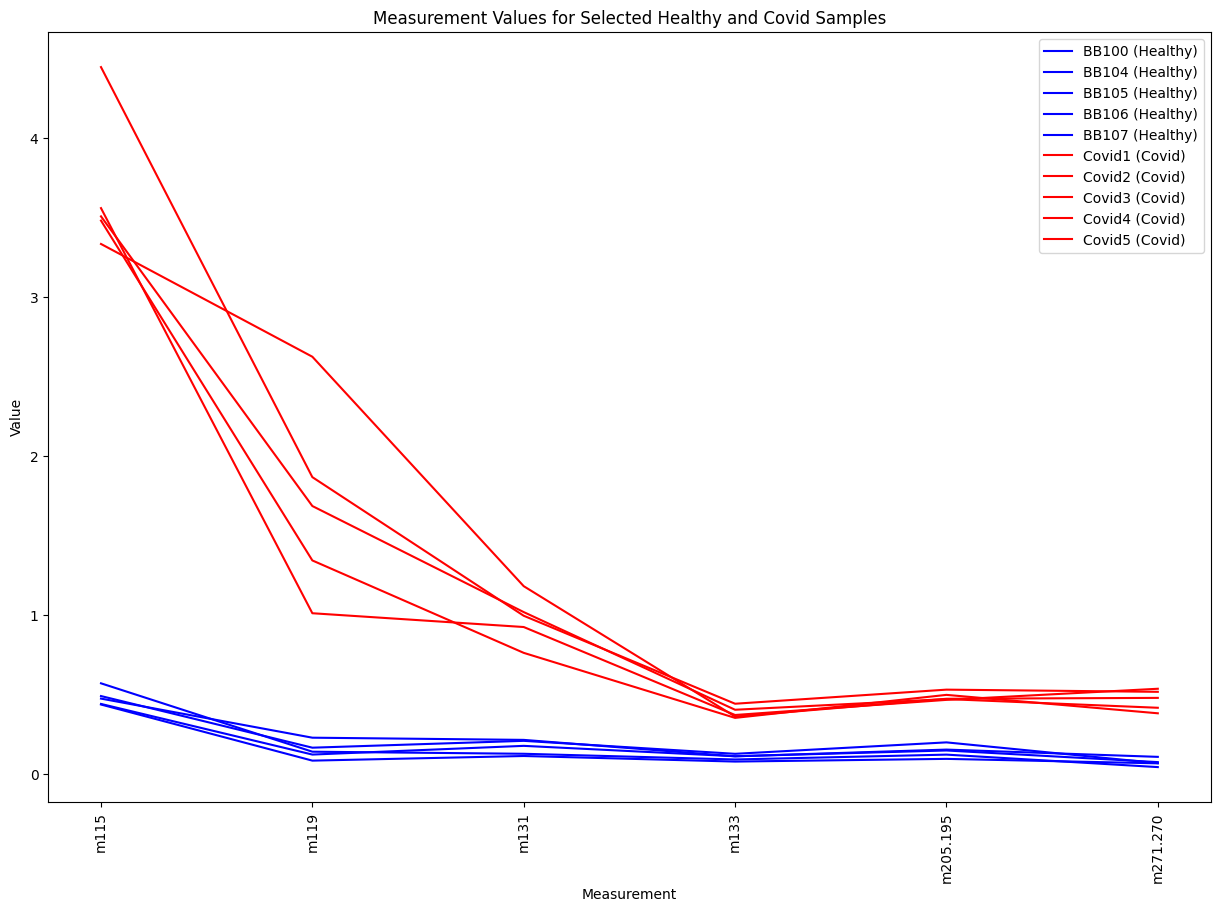

In [33]:
import matplotlib.pyplot as plt

# Select 5 Healthy and 5 Covid samples
healthy_samples = final_data_retained_features[final_data_retained_features['Pos_Neg'] == 'Healthy'].head(
    5)
covid_samples = final_data_retained_features[final_data_retained_features['Pos_Neg'] == 'Covid'].head(
    5)

# Combine the selected samples
combined_samples = pd.concat([healthy_samples, covid_samples])


# Define colors for the groups
color_map = {'BB': 'blue', 'Covid': 'red'}

plt.figure(figsize=(15, 10))

# Plot each sample with color coding
for index, row in combined_samples.iterrows():
    # Determine the color based on the 'Samples' column prefix
    sample_prefix = 'BB' if row['Samples'].startswith('BB') else 'Covid'
    color = color_map[sample_prefix]

    plt.plot(row.index[2:], row.values[2:],
             label=f"{row['Samples']} ({row['Pos_Neg']})", color=color)

plt.title('Measurement Values for Selected Healthy and Covid Samples')
plt.xlabel('Measurement')
plt.ylabel('Value')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

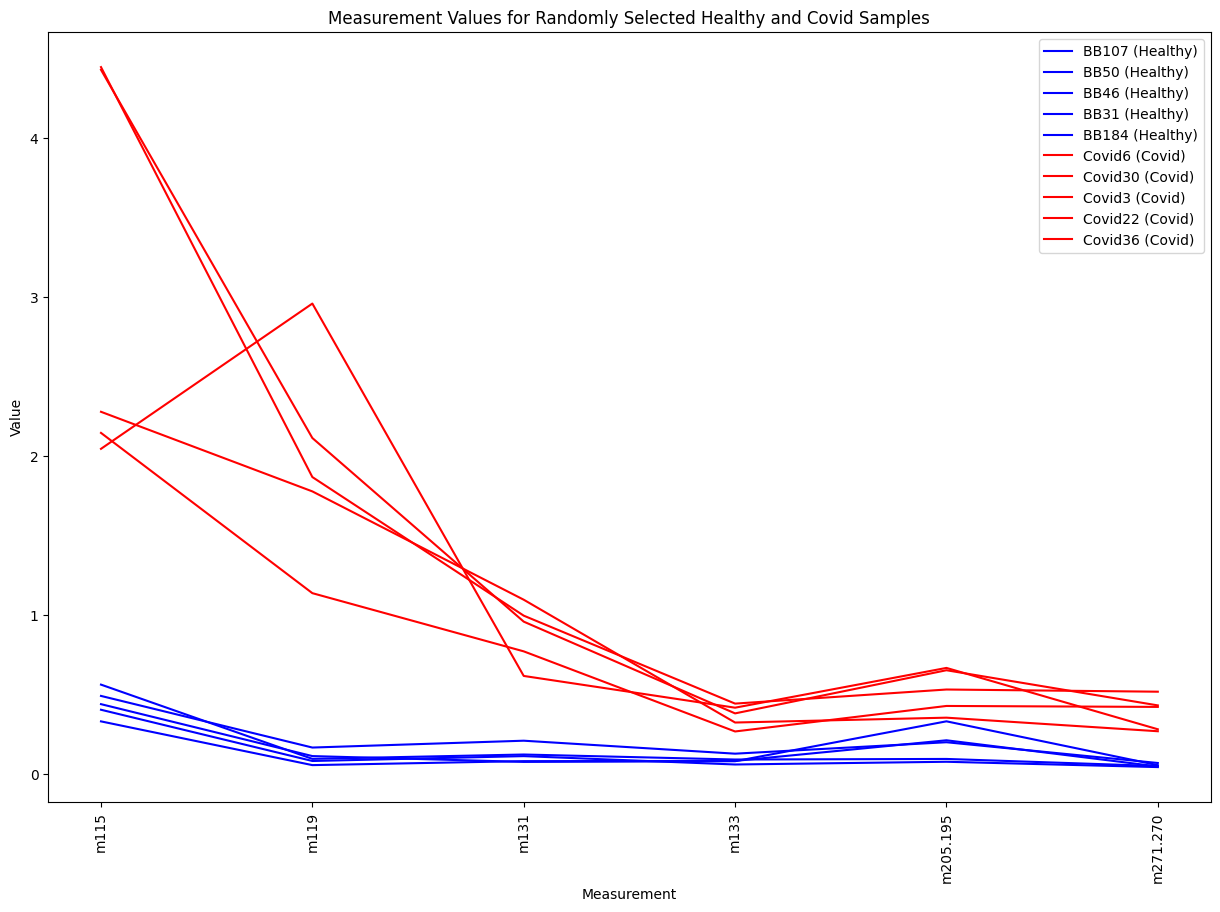

In [34]:
# Randomly select 5 Healthy and 5 Covid samples instead of using head()
healthy_samples_random = final_data_retained_features[final_data_retained_features['Pos_Neg'] == 'Healthy'].sample(
    n=5, random_state=None)
covid_samples_random = final_data_retained_features[final_data_retained_features['Pos_Neg'] == 'Covid'].sample(
    n=5, random_state=None)

# Combine the randomly selected samples
combined_samples_random = pd.concat(
    [healthy_samples_random, covid_samples_random])

plt.figure(figsize=(15, 10))

# Plot each sample with color coding using the randomized selection
for index, row in combined_samples_random.iterrows():
    # Determine the color based on the 'Samples' column prefix
    sample_prefix = 'BB' if row['Samples'].startswith('BB') else 'Covid'
    color = color_map[sample_prefix]

    plt.plot(row.index[2:], row.values[2:],
             label=f"{row['Samples']} ({row['Pos_Neg']})", color=color)

plt.title('Measurement Values for Randomly Selected Healthy and Covid Samples')
plt.xlabel('Measurement')
plt.ylabel('Value')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

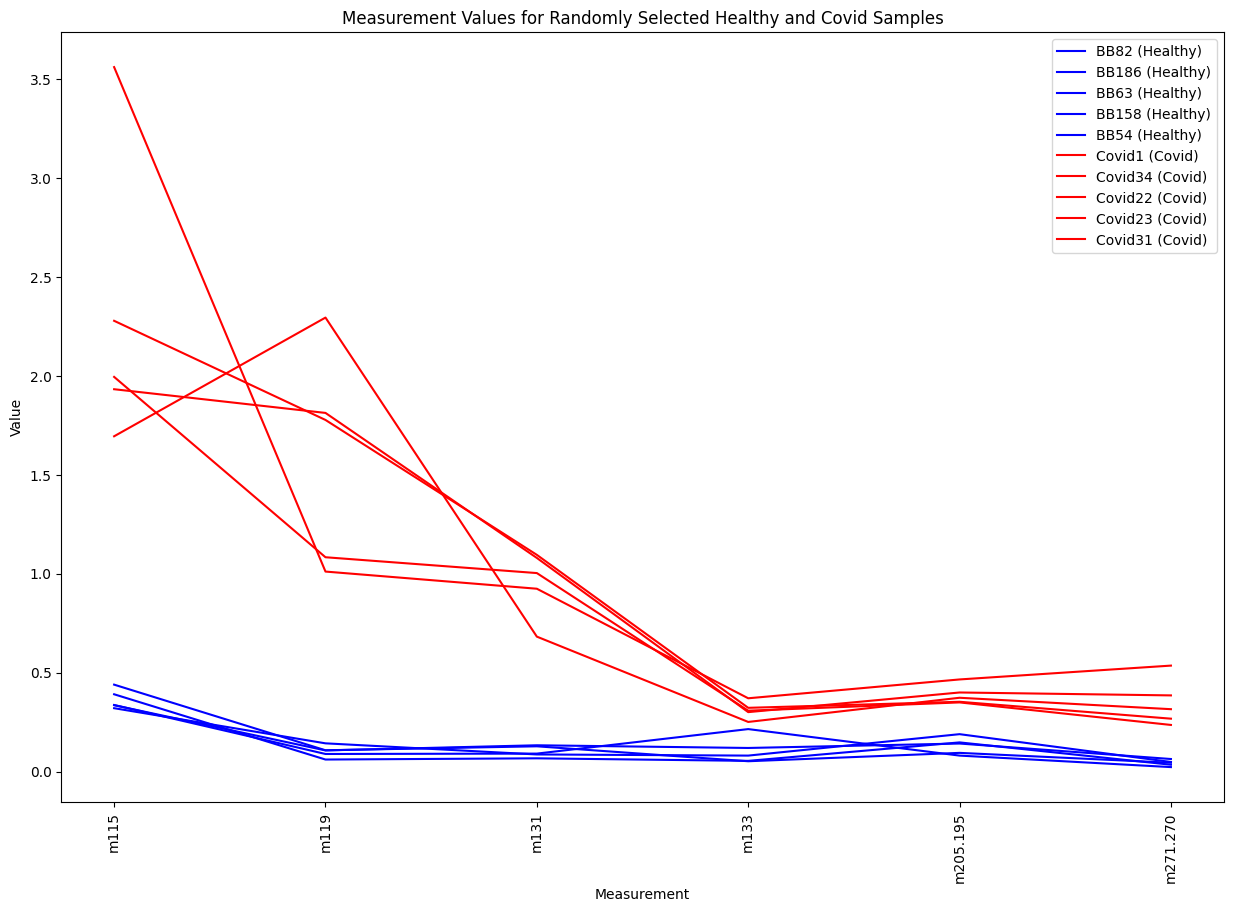

In [35]:
# Randomly select 5 Healthy and 5 Covid samples instead of using head()
healthy_samples_random = final_data_retained_features[final_data_retained_features['Pos_Neg'] == 'Healthy'].sample(
    n=5, random_state=None)
covid_samples_random = final_data_retained_features[final_data_retained_features['Pos_Neg'] == 'Covid'].sample(
    n=5, random_state=None)

# Combine the randomly selected samples
combined_samples_random = pd.concat(
    [healthy_samples_random, covid_samples_random])

plt.figure(figsize=(15, 10))

# Plot each sample with color coding using the randomized selection
for index, row in combined_samples_random.iterrows():
    # Determine the color based on the 'Samples' column prefix
    sample_prefix = 'BB' if row['Samples'].startswith('BB') else 'Covid'
    color = color_map[sample_prefix]

    plt.plot(row.index[2:], row.values[2:],
             label=f"{row['Samples']} ({row['Pos_Neg']})", color=color)

plt.title('Measurement Values for Randomly Selected Healthy and Covid Samples')
plt.xlabel('Measurement')
plt.ylabel('Value')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

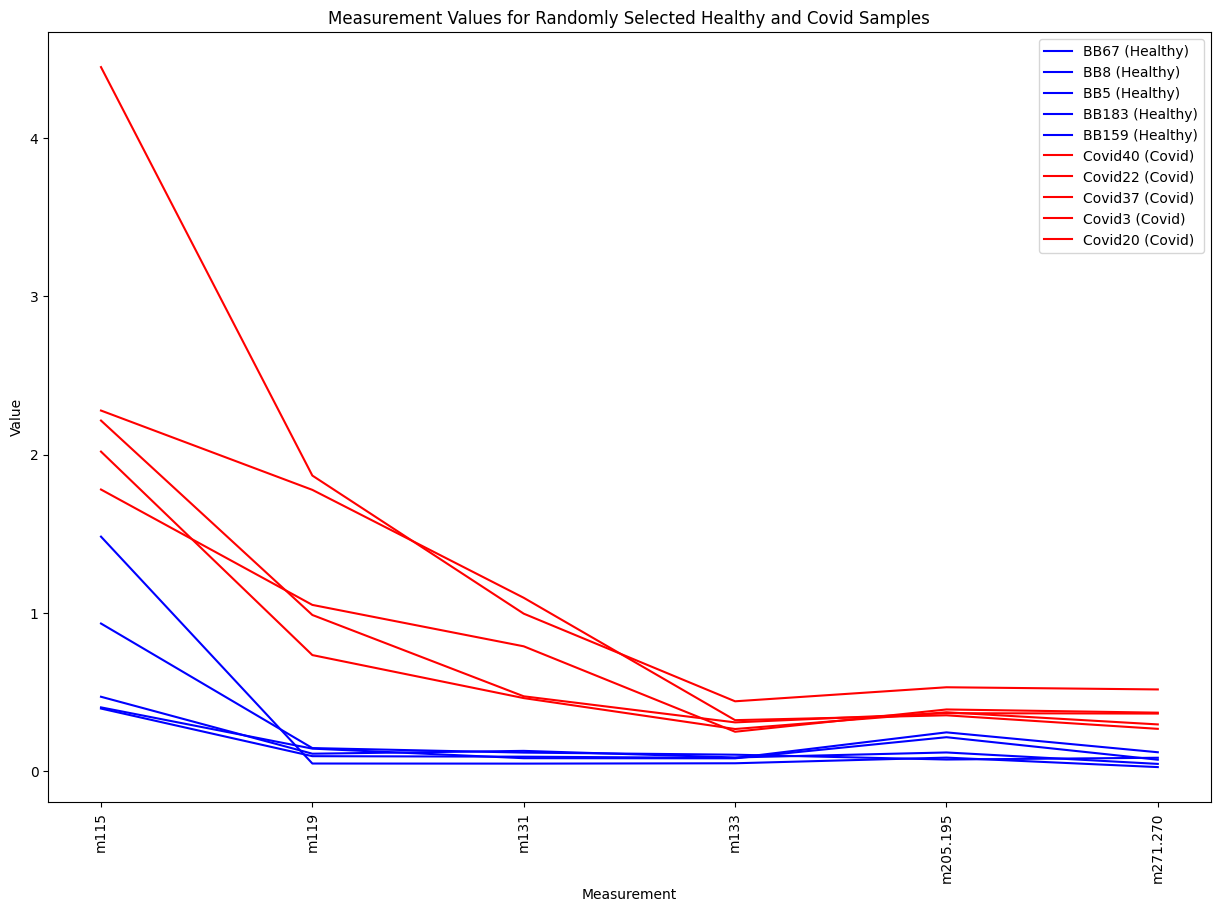

In [36]:
# Randomly select 5 Healthy and 5 Covid samples instead of using head()
healthy_samples_random = final_data_retained_features[final_data_retained_features['Pos_Neg'] == 'Healthy'].sample(
    n=5, random_state=None)
covid_samples_random = final_data_retained_features[final_data_retained_features['Pos_Neg'] == 'Covid'].sample(
    n=5, random_state=None)

# Combine the randomly selected samples
combined_samples_random = pd.concat(
    [healthy_samples_random, covid_samples_random])

plt.figure(figsize=(15, 10))

# Plot each sample with color coding using the randomized selection
for index, row in combined_samples_random.iterrows():
    # Determine the color based on the 'Samples' column prefix
    sample_prefix = 'BB' if row['Samples'].startswith('BB') else 'Covid'
    color = color_map[sample_prefix]

    plt.plot(row.index[2:], row.values[2:],
             label=f"{row['Samples']} ({row['Pos_Neg']})", color=color)

plt.title('Measurement Values for Randomly Selected Healthy and Covid Samples')
plt.xlabel('Measurement')
plt.ylabel('Value')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

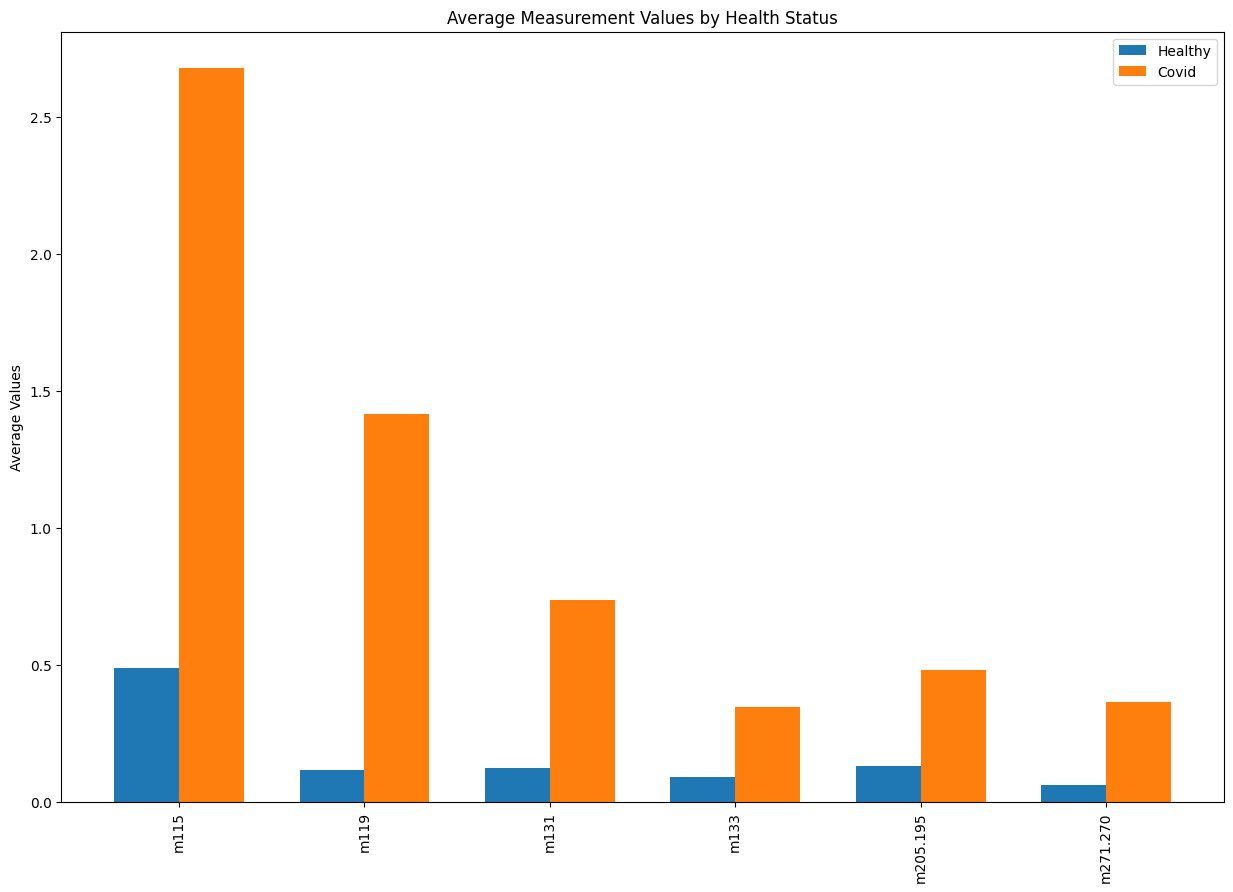

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure you're working with the final_data_retained_features DataFrame
# Select only numeric columns for mean calculation
# numeric_cols = final_data_retained_features.select_dtypes(include=[np.number])
numeric_cols = final_data_retained_features.iloc[:, 2:]

# Include 'Pos_Neg' for grouping
numeric_cols_with_info = pd.concat(
    [final_data_retained_features['Pos_Neg'], numeric_cols], axis=1)

# Group by 'Pos_Neg' and calculate mean only for numeric columns
average_values = numeric_cols_with_info.groupby('Pos_Neg').mean()

# Transpose for easier plotting (features on x-axis)
average_values_transposed = average_values.transpose()

# Plotting
plt.figure(figsize=(15, 10))
width = 0.35  # the width of the bars
# the x locations for the groups
ind = np.arange(len(average_values_transposed))

# Plotting each bar for 'Healthy' and 'Covid'
bars1 = plt.bar(
    ind - width/2, average_values_transposed['Healthy'], width, label='Healthy')
bars2 = plt.bar(
    ind + width/2, average_values_transposed['Covid'], width, label='Covid')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Average Values')
plt.title('Average Measurement Values by Health Status')
plt.xticks(ind, average_values_transposed.index, rotation=90)
plt.legend()

plt.show()

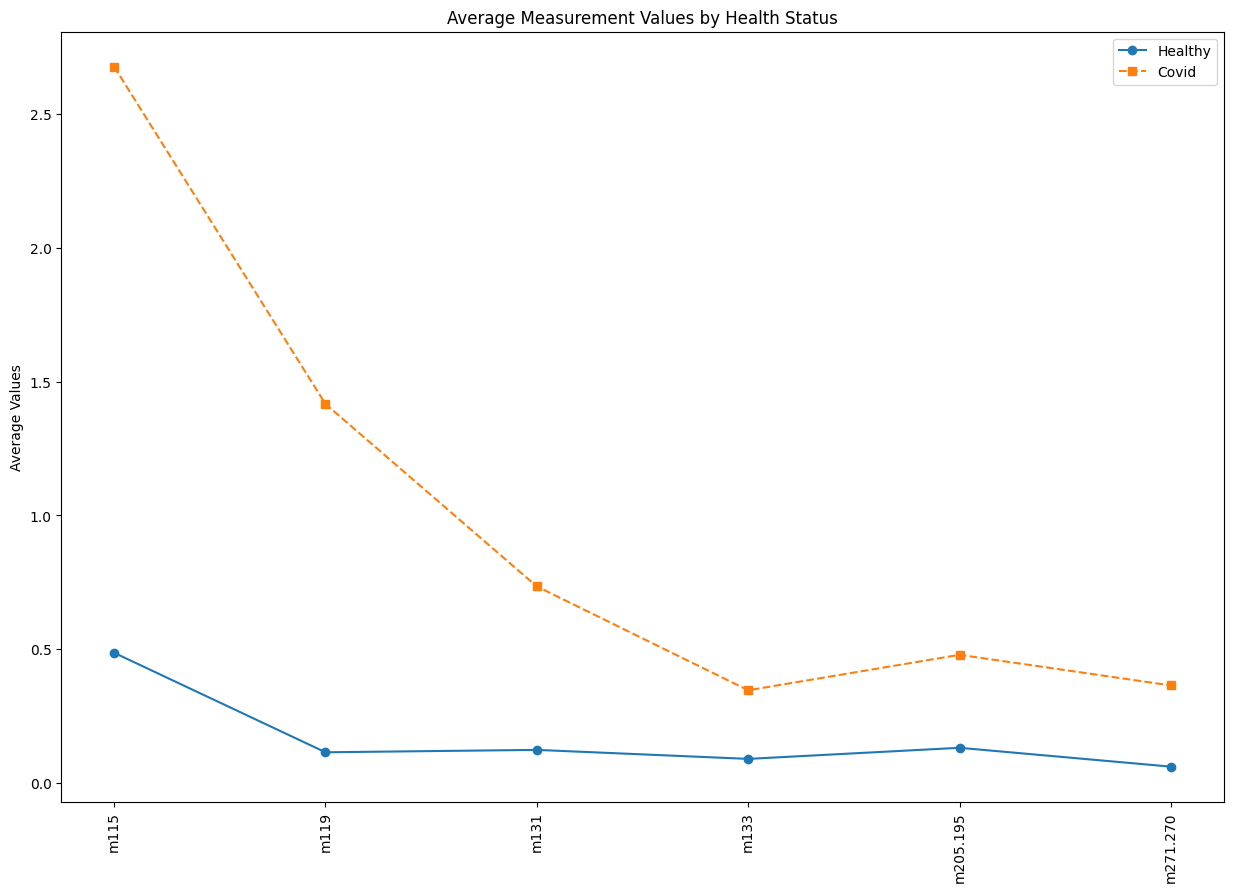

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure you're working with the final_data_retained_features DataFrame
# Select only numeric columns for mean calculation
numeric_cols = final_data_retained_features.select_dtypes(include=[np.number])

# Include 'Pos_Neg' for grouping
numeric_cols_with_info = pd.concat(
    [final_data_retained_features['Pos_Neg'], numeric_cols], axis=1)

# Group by 'Pos_Neg' and calculate mean only for numeric columns
average_values = numeric_cols_with_info.groupby('Pos_Neg').mean()

# Transpose for easier plotting (features on x-axis)
average_values_transposed = average_values.transpose()

# Plotting
plt.figure(figsize=(15, 10))

# Plotting each line for 'Healthy' and 'Covid'
plt.plot(average_values_transposed.index,
         average_values_transposed['Healthy'], marker='o', linestyle='-', label='Healthy')
plt.plot(average_values_transposed.index,
         average_values_transposed['Covid'], marker='s', linestyle='--', label='Covid')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Average Values')
plt.title('Average Measurement Values by Health Status')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()

plt.show()

In [39]:
from sklearn.decomposition import PCA


X_pca = final_data_retained_features.iloc[:, 2:]


X_pca_scaled = scaler.fit_transform(X_pca)


pca = PCA()
X_pca_transformed = pca.fit_transform(X_pca_scaled)


num_components = pca.n_components_
explained_variance = pca.explained_variance_ratio_

num_components, explained_variance

(6,
 array([0.86318914, 0.04915566, 0.02833807, 0.02237728, 0.02115944,
        0.01578042]))

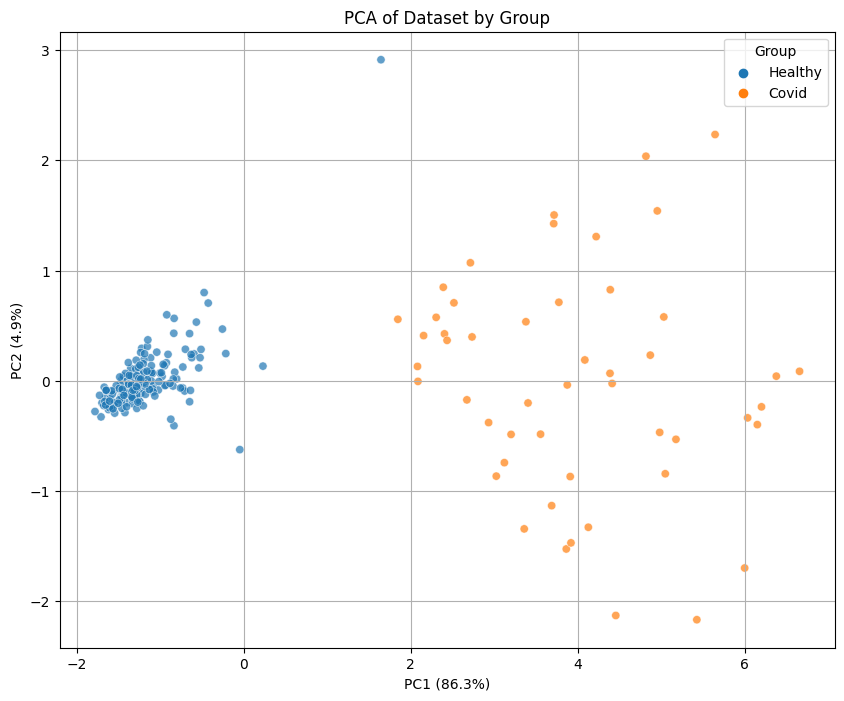

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


pca_df = pd.DataFrame(X_pca_transformed[:, :2], columns=['PC1', 'PC2'])
pca_df['Group'] = final_data_retained_features['Pos_Neg'].values


plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Group', alpha=0.7)


plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)')
plt.title('PCA of Dataset by Group')
plt.legend(title='Group')
plt.grid(True)
plt.show()

In [41]:
# Extract eigenvectors (loadings) from the PCA model
eigenvectors = pca.components_

# Convert the eigenvectors to a DataFrame for easier handling
eigenvectors_df = pd.DataFrame(eigenvectors, columns=non_zero_coefficients)

# Calculate the absolute values of the coefficients in the eigenvectors
abs_eigenvectors_df = eigenvectors_df.abs()

# Display the absolute values of the coefficients for each principal component
abs_eigenvectors_df

m115      m119      m131      m133  m205.195  m271.270
0  0.412235  0.404561  0.404410  0.401910  0.409466  0.416714
1  0.018143  0.530135  0.533646  0.468503  0.426914  0.179165
2  0.586959  0.052450  0.305550  0.681690  0.251719  0.176929
3  0.073788  0.617694  0.494798  0.168247  0.197273  0.548599
4  0.682603  0.219755  0.021679  0.348914  0.557545  0.229551
5  0.117562  0.350283  0.461540  0.065000  0.486771  0.639759